# Fitbit Data Analysis - Complete Enhanced Version

## Step 1: Install and Import Required Packages

In [135]:
print("STEP 1: Installing and importing required packages...")

STEP 1: Installing and importing required packages...


In [136]:
%pip install pandas matplotlib seaborn networkx scikit-learn imbalanced-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [137]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, precision_recall_fscore_support,
                            precision_recall_curve)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [138]:
print("All packages successfully imported!\n")

All packages successfully imported!



## Step 2: Load and Prepare Data

In [139]:
print("STEP 2: Loading and preparing data...")

STEP 2: Loading and preparing data...


In [140]:
path = "../datas/Data Coaching Fitbit/"
files = glob.glob(os.path.join(path, "*.csv"))

In [141]:
print(f"Found {len(files)} CSV files in directory")

Found 7 CSV files in directory


In [142]:
dfs = []

for file in files:
    print(f"Processing file: {os.path.basename(file)}")
    df = pd.read_csv(file)
    df['date'] = pd.to_datetime(df['date'])
    df = df[df['date'].dt.weekday < 5]  # Keep only weekdays
    df = df[df['date'].dt.hour <= 18]   # Keep only records before 18:00
    dfs.append(df)

Processing file: 1119.csv


Processing file: 1120.csv
Processing file: 1121.csv
Processing file: 1122.csv
Processing file: 1123.csv
Processing file: 1124.csv
Processing file: 1125.csv


In [143]:
df = pd.concat(dfs, ignore_index=True)

print(f"\nFinal dataset shape: {df.shape}")
print("Data preparation complete!\n")


Final dataset shape: (1044240, 8)
Data preparation complete!



## Step 3: Define Visualization Functions

In [144]:
print("STEP 3: Setting up visualization functions...")

STEP 3: Setting up visualization functions...


In [145]:
def show_plot(
        x_ticks_rotation=None, x_ticks_ticks=None, x_ticks_label=None,
        tight_layout=None, fig_size=None, title=None, x_label=None,
        y_label=None, legend=False, tile_font_size=None,
        reg_plot_data=None, reg_plot_x=None, reg_plot_y=None,
        reg_plot_scatter=None, reg_plot_ci=None, reg_plot_label=None,
        nbr_of_reg_plot=0, reg_plot_line_kws=None, reg_plot_color=None,
        line_plot_data=None, line_plot_x=None, line_plot_y=None,  # New parameters for lineplot
        line_plot_hue=None, line_plot_style=None, line_plot_palette=None,
        heatmap_data=None, heatmap_annot=None, heatmap_cmap=None,
        heatmap_center=None, heatmap_fmt=None, heatmap_xticklabels=None,
        heatmap_yticklabels=None,
        dag_graph=None, dag_pos=None, dag_with_labels=None,
        dag_node_size=None, dag_node_color=None, dag_node_font_size=None,
        dag_font_weight=None, dag_edge_color=None,
        bar_plot_x=None, bar_plot_y=None, bar_plot_hue=None,
        bar_plot_palette=None, bar_plot_legend=None,
        classification_report=None,
        cr_plot_type='None', cr_cmap=None, cr_palette=None,
        cr_show_colorbar=None,
        hline_value=None, hline_label=None,
        grid=False, legend_title=None,

        heatmap_linewidths=None,  # New parameter for heatmap grid lines
        heatmap_linecolor=None,   # New parameter for heatmap grid color
        heatmap_annot_kws=None,   # New parameter for annotation styling
        heatmap_cbar_kws=None,    # New parameter for colorbar customization
        title_pad=None,          # New parameter for title padding
    ):

    fig, ax = plt.subplots(figsize=fig_size if fig_size is not None else (12, 6))

    # Line plot (new section)
    if line_plot_data is not None and line_plot_x is not None and line_plot_y is not None:
        sns.lineplot(
            data=line_plot_data,
            x=line_plot_x,
            y=line_plot_y,
            hue=line_plot_hue,
            style=line_plot_style,
            palette=line_plot_palette,
            ax=ax
        )

    # Regression plots
    if nbr_of_reg_plot > 0 and reg_plot_data is not None and reg_plot_x is not None and reg_plot_y is not None:
        if not isinstance(reg_plot_data, list):
            reg_plot_data = [reg_plot_data] * nbr_of_reg_plot
        if not isinstance(reg_plot_x, list):
            reg_plot_x = [reg_plot_x] * nbr_of_reg_plot
        if not isinstance(reg_plot_y, list):
            reg_plot_y = [reg_plot_y] * nbr_of_reg_plot
        if not isinstance(reg_plot_scatter, list):
            reg_plot_scatter = [reg_plot_scatter] * nbr_of_reg_plot
        if not isinstance(reg_plot_ci, list):
            reg_plot_ci = [reg_plot_ci] * nbr_of_reg_plot
        if not isinstance(reg_plot_label, list):
            reg_plot_label = [reg_plot_label] * nbr_of_reg_plot
        if not isinstance(reg_plot_line_kws, list):
            reg_plot_line_kws = [reg_plot_line_kws] * nbr_of_reg_plot
        if not isinstance(reg_plot_color, list):
            reg_plot_color = [reg_plot_color] * nbr_of_reg_plot

        for i in range(nbr_of_reg_plot):
            sns.regplot(
                data=reg_plot_data[i], x=reg_plot_x[i], y=reg_plot_y[i],
                scatter=reg_plot_scatter[i] if reg_plot_scatter[i] is not None else True,
                ci=reg_plot_ci[i],
                label=reg_plot_label[i],
                line_kws=reg_plot_line_kws[i],
                color=reg_plot_color[i],
                ax=ax
            )

    # Heatmap
    if heatmap_data is not None:
        if heatmap_xticklabels is not None:
            sns.heatmap(
                data=heatmap_data, annot=heatmap_annot, cmap=heatmap_cmap,
                center=heatmap_center, fmt=heatmap_fmt,
                xticklabels=heatmap_xticklabels, yticklabels=heatmap_yticklabels,
                ax=ax
            )
        elif heatmap_linecolor is not None:
            sns.heatmap(
                data=heatmap_data,
                annot=heatmap_annot,
                cmap=heatmap_cmap,
                center=heatmap_center,
                fmt=heatmap_fmt,
                xticklabels=heatmap_xticklabels,
                yticklabels=heatmap_yticklabels,
                linewidths=heatmap_linewidths,
                linecolor=heatmap_linecolor,
                annot_kws=heatmap_annot_kws,
                cbar_kws=heatmap_cbar_kws,
                ax=ax
            )
        else:
            sns.heatmap(
                data=heatmap_data, annot=heatmap_annot, cmap=heatmap_cmap,
                center=heatmap_center,
                ax=ax
            )

    # DAG visualization
    if dag_graph is not None:
        nx.draw(
            dag_graph, pos=dag_pos, with_labels=dag_with_labels,
            node_size=dag_node_size, node_color=dag_node_color,
            font_size=dag_node_font_size, font_weight=dag_font_weight,
            edge_color=dag_edge_color, ax=ax
        )

    # Bar plot
    if bar_plot_x is not None and bar_plot_y is not None:
        sns.barplot(
            x=bar_plot_x,
            y=bar_plot_y,
            hue=bar_plot_hue,
            palette=bar_plot_palette,
            legend=bar_plot_legend,
            ax=ax
        )

    # Classification report visualization
    if classification_report is not None:
        report_df = pd.DataFrame(classification_report).transpose()
        metrics_df = report_df.drop('support', axis=1, errors='ignore')
        support_series = report_df['support'] if 'support' in report_df else None

        if cr_plot_type == 'heatmap':
            sns.heatmap(
                metrics_df, annot=True, cmap=cr_cmap, fmt='.2f',
                ax=ax, cbar=cr_show_colorbar, linewidths=0.5,
                vmin=0, vmax=1, cbar_kws={'label': 'Score'}
            )

            if support_series is not None:
                for i, val in enumerate(support_series):
                    ax.text(len(metrics_df.columns)+0.5, i+0.5, f"support: {int(val)}",
                            ha='center', va='center')

            ax.set_title('Classification Report' if title is None else title,
                        fontsize=tile_font_size if tile_font_size is not None else 16)
            ax.set_xlim(0, len(metrics_df.columns)+1)

        elif cr_plot_type == 'barplot':
            if cr_palette is None:
                cr_palette = {'precision': '#3498db', 'recall': '#e74c3c', 'f1-score': '#2ecc71'}

            metrics_df = report_df.reset_index().melt(
                id_vars='index',
                value_vars=['precision', 'recall', 'f1-score'],
                var_name='Metric',
                value_name='Score'
            )

            sns.barplot(
                x='index', y='Score', hue='Metric',
                data=metrics_df, palette=cr_palette, ax=ax
            )
            ax.set_title('Classification Report Metrics' if title is None else title,
                        fontsize=tile_font_size if tile_font_size is not None else 16)
            if legend:
                ax.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Set x-ticks if provided
    if x_ticks_ticks is not None and x_ticks_label is not None:
        ax.set_xticks(x_ticks_ticks)
        ax.set_xticklabels(x_ticks_label, rotation=x_ticks_rotation if x_ticks_rotation is not None else 0)

    # Set title and labels
    if title is not None:
        ax.set_title(title,
                    fontsize=tile_font_size if tile_font_size is not None else 16,
                    pad=title_pad)
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)

    if hline_value is not None:
        ax.axhline(y=hline_value, color='red', linestyle='--',
                linewidth=1, label=hline_label)

    # Show grid if requested
    if grid:
        ax.grid(True, alpha=0.3)

    # Show legend
    if legend:
        if legend_title:
            ax.legend(title=legend_title)
        else:
            ax.legend()

    if tight_layout is not None:
        fig.tight_layout(rect=tight_layout)

    plt.show()

In [225]:
def show_sub_plot(data, plot_config, fig_size=None, title=None,
                    xticks_rotation=45, tight_layout=[0, 0, 1, 0.96],
                    plot_type='line', facet_col=None, facet_col_wrap=None,
                    facet_height=4, facet_aspect=1.2, title_y=1.02):
    """
    Enhanced version that perfectly matches original FacetGrid output
    """
    if facet_col is not None:
        # Calculate figure size if not provided
        if fig_size is None:
            if facet_col_wrap:
                n_cols = min(facet_col_wrap, data[facet_col].nunique())
                n_rows = int(np.ceil(data[facet_col].nunique() / facet_col_wrap))
                fig_width = n_cols * facet_height * facet_aspect
                fig_height = n_rows * facet_height
                fig_size = (fig_width, fig_height)

        # Create FacetGrid with original parameters
        g = sns.FacetGrid(data, col=facet_col, col_wrap=facet_col_wrap,
                            height=facet_height, aspect=facet_aspect)

        for config in plot_config:
            g.map_dataframe(
                sns.lineplot,
                x=config['x'],
                y=config['y'],
                hue=config.get('hue'),
                style=config.get('style'),
                palette=config.get('palette'),
                estimator='mean',
                errorbar=None
            )

        g.add_legend()
        g.set_axis_labels(plot_config[0].get('xlabel', ''),
                        plot_config[0].get('ylabel', ''))
        g.set_titles('{col_name}')

        if title:
            plt.suptitle(title, y=title_y)

        plt.show()
        return

    n_plots = len(plot_config)
    n_rows = int(np.ceil(n_plots / 2))

    fig, axes = plt.subplots(n_rows, min(2, n_plots), figsize=fig_size)
    axes = axes.flatten() if n_plots > 1 else [axes]

    if title:
        fig.suptitle(title)

    for ax, config in zip(axes, plot_config):
        current_type = config.get('type', plot_type)

        if current_type == 'line':
            ax.plot(data[config['x']], data[config['y']],
                    marker=config.get('marker', 'o'),
                    linestyle=config.get('linestyle', '-'),
                    color=config.get('color'),
                    label=config.get('label'))
        elif current_type == 'bar':
            data[config['y']].plot(kind='bar', ax=ax,
                                    color=config.get('color'),
                                    label=config.get('label'))

        ax.set_title(config.get('title', ''))
        ax.set_xlabel(config.get('xlabel', ''))
        ax.set_ylabel(config.get('ylabel', ''))

        if 'xticklabels' in config:
            ax.set_xticklabels(config['xticklabels'], rotation=xticks_rotation)
        elif xticks_rotation:
            ax.tick_params(axis='x', rotation=xticks_rotation)

        if config.get('legend'):
            ax.legend()

    plt.tight_layout(rect=tight_layout)
    plt.show()

In [147]:
print("Visualization functions ready!\n")

Visualization functions ready!



## Step 4: Exploratory Data Analysis

In [148]:
print("STEP 4: Performing exploratory data analysis...")

STEP 4: Performing exploratory data analysis...


### Plot 1: Individual Activity Analysis

In [149]:
def plot_person_data(treatment_id, df):
    plot_config = [
        {'x': 'date', 'y': 'steps', 'type': 'line', 'color': None,
            'title': 'Steps Over Time', 'ylabel': 'Steps', 'xlabel': 'Date'},
        {'x': 'date', 'y': 'calories', 'type': 'line', 'color': 'red',
            'title': 'Calories Burned Over Time', 'ylabel': 'Calories', 'xlabel': 'Date'},
        {'x': 'date', 'y': 'distance', 'type': 'line', 'color': 'green',
            'title': 'Distance Over Time', 'ylabel': 'Distance (km)', 'xlabel': 'Date'},
        {'x': 'date', 'y': 'mets', 'type': 'line', 'color': 'purple',
            'title': 'METs Over Time', 'ylabel': 'METs', 'xlabel': 'Date'}
    ]

    show_sub_plot(
        data=df,
        plot_config=plot_config,
        title=f'Activity Data for Person {treatment_id}',
        fig_size=(12, 10),
        xticks_rotation=45,
        tight_layout=[0, 0, 1, 0.96],
        plot_type='line'
    )

Plotting data for user 1119


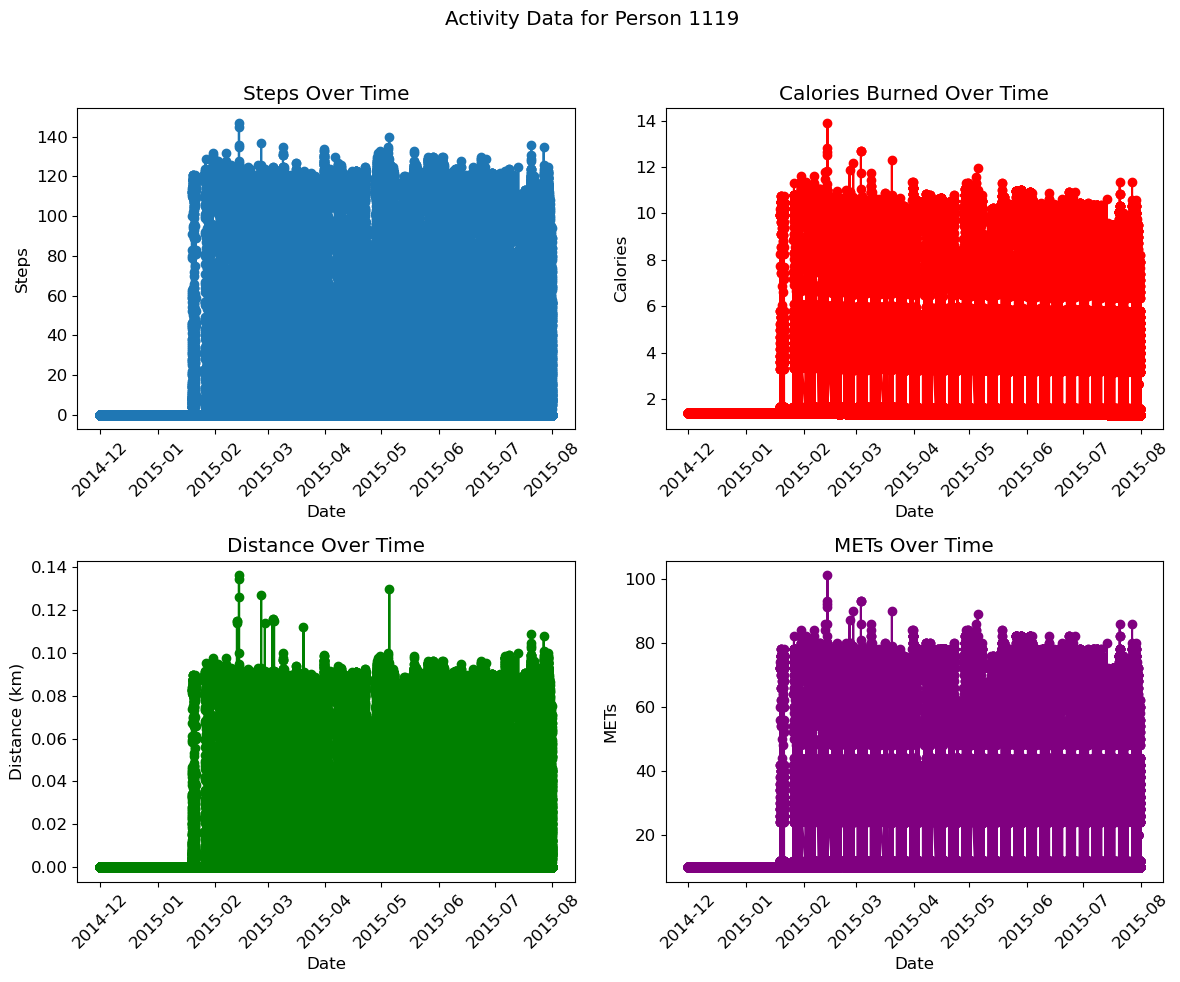

Plotting data for user 1120


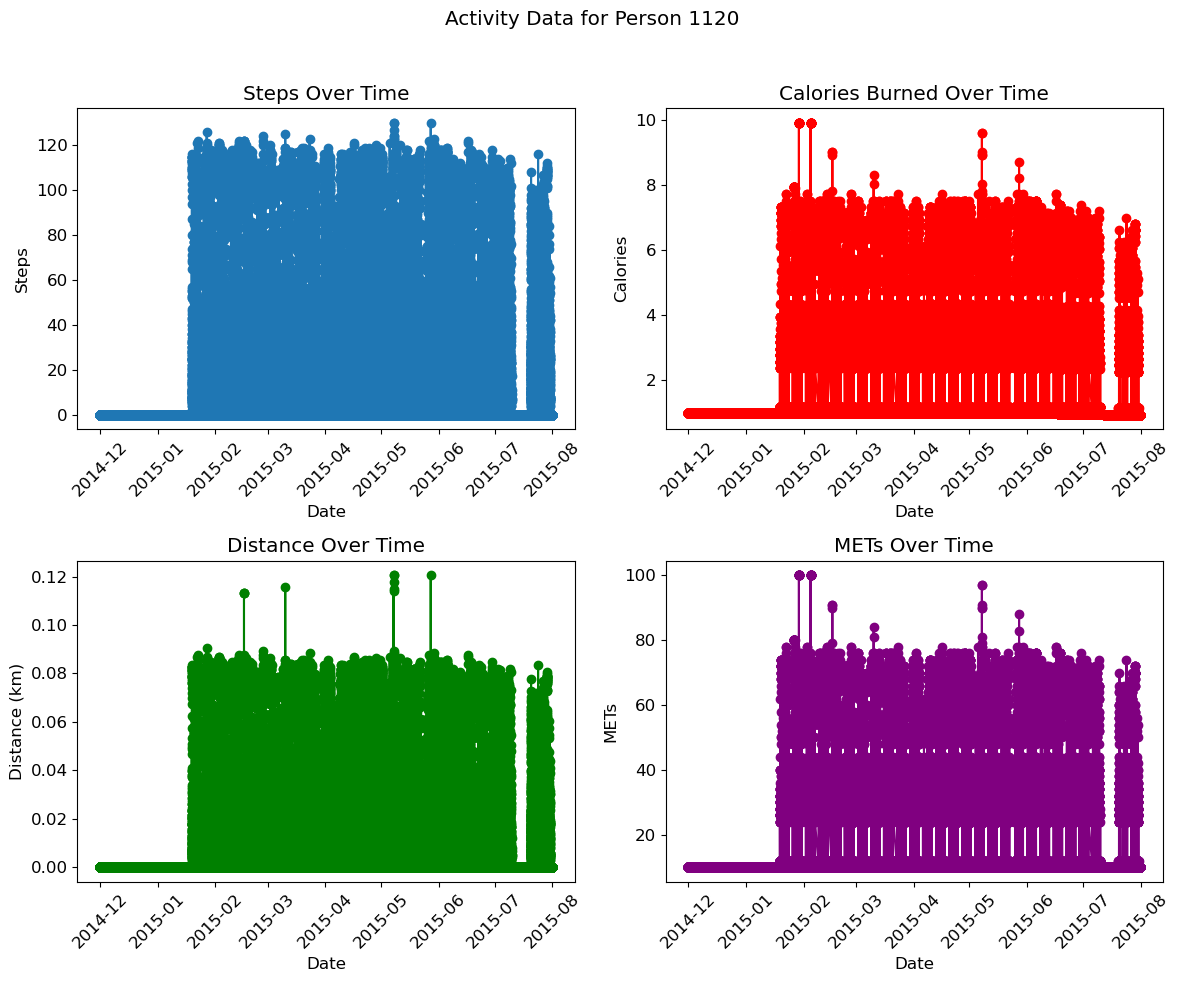

Plotting data for user 1121


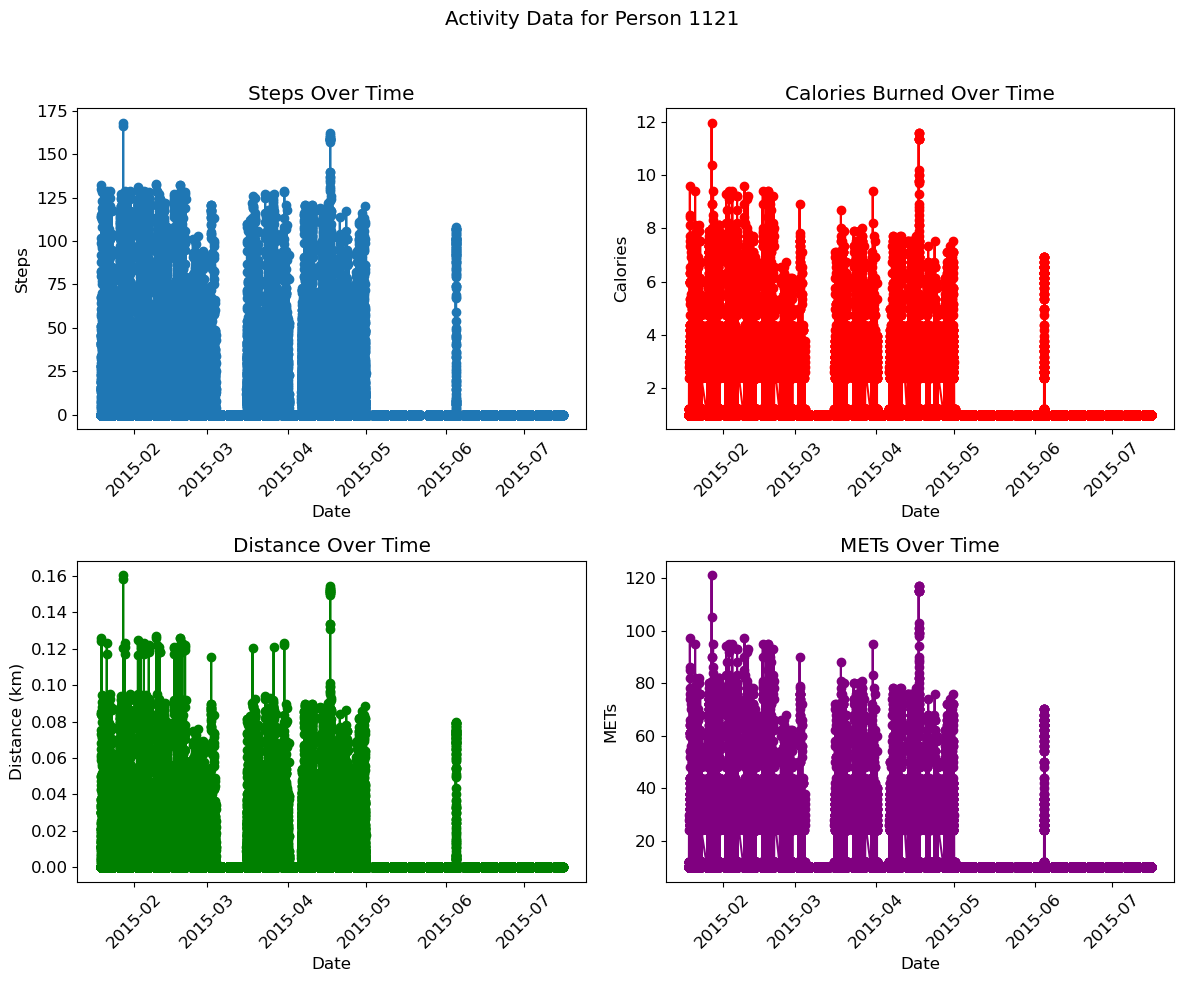

Plotting data for user 1122


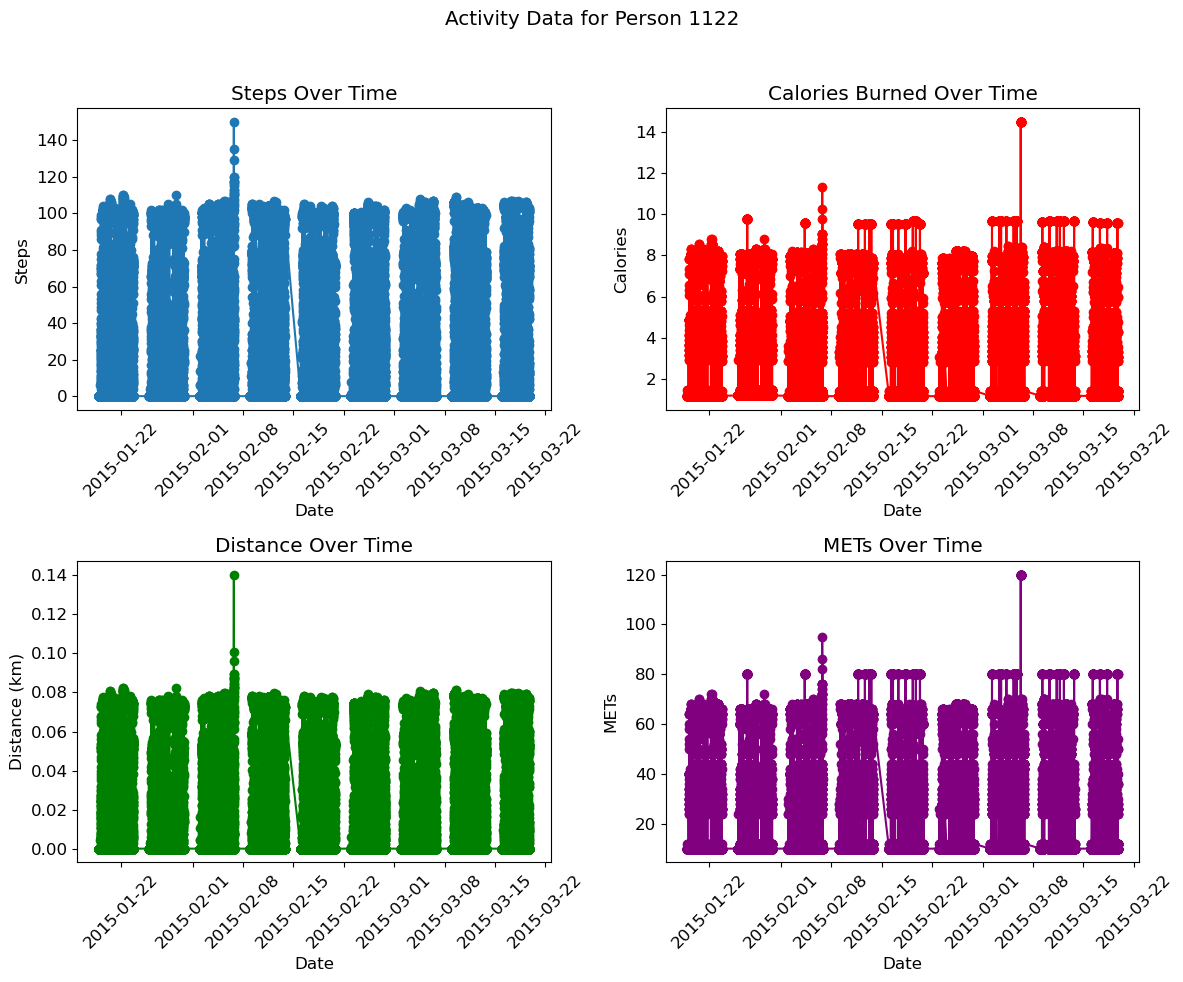

Plotting data for user 1123


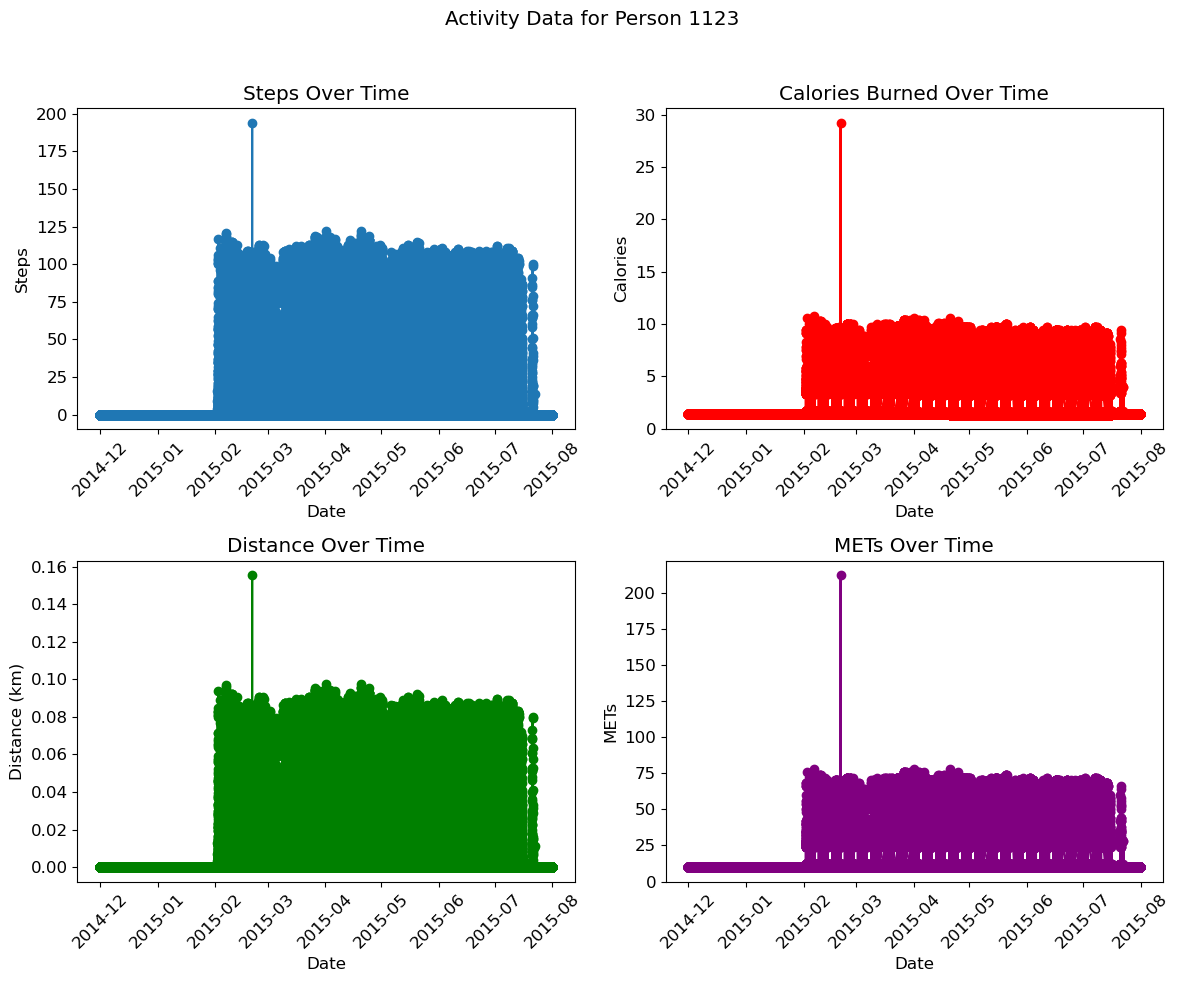

Plotting data for user 1124


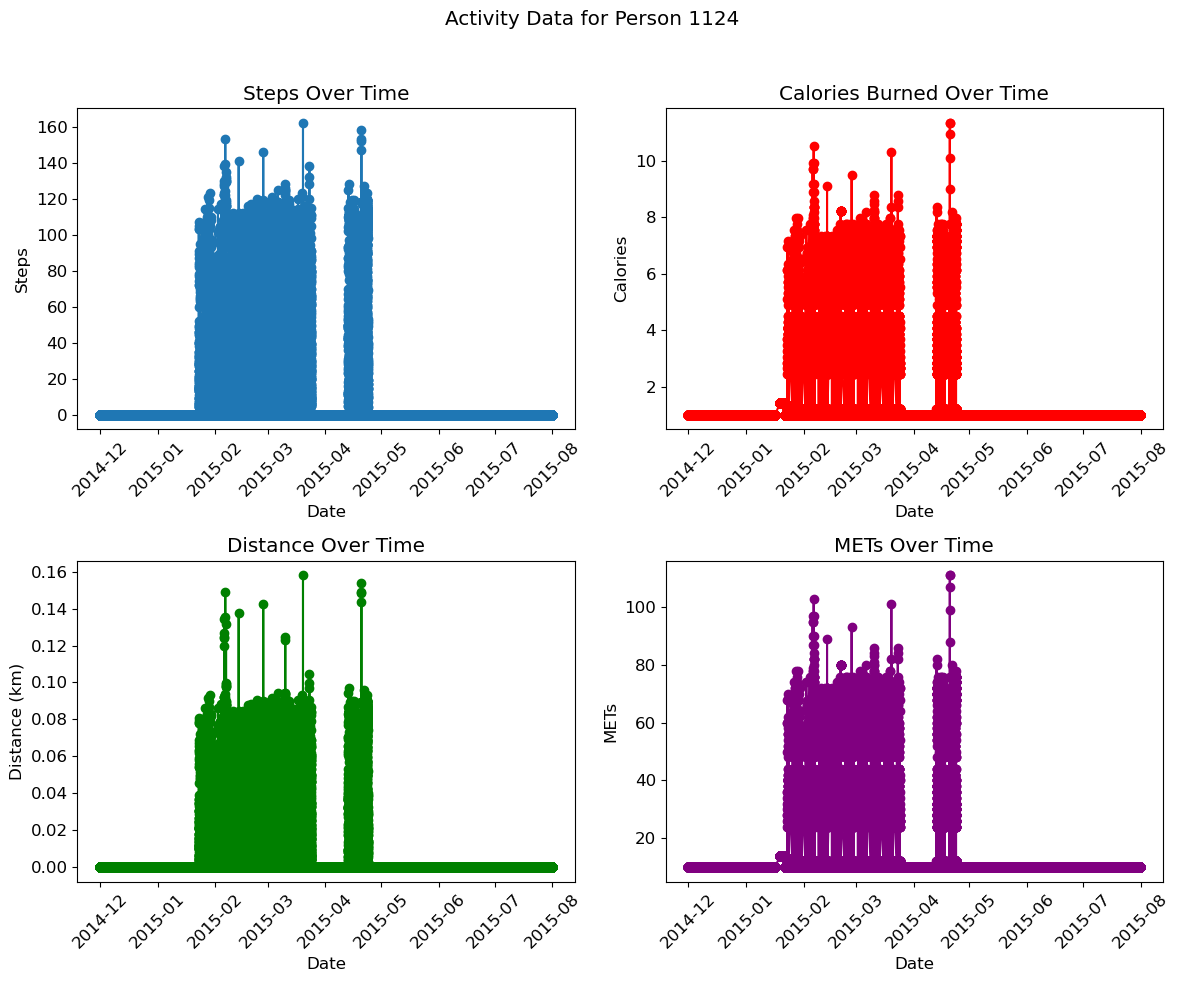

Plotting data for user 1125


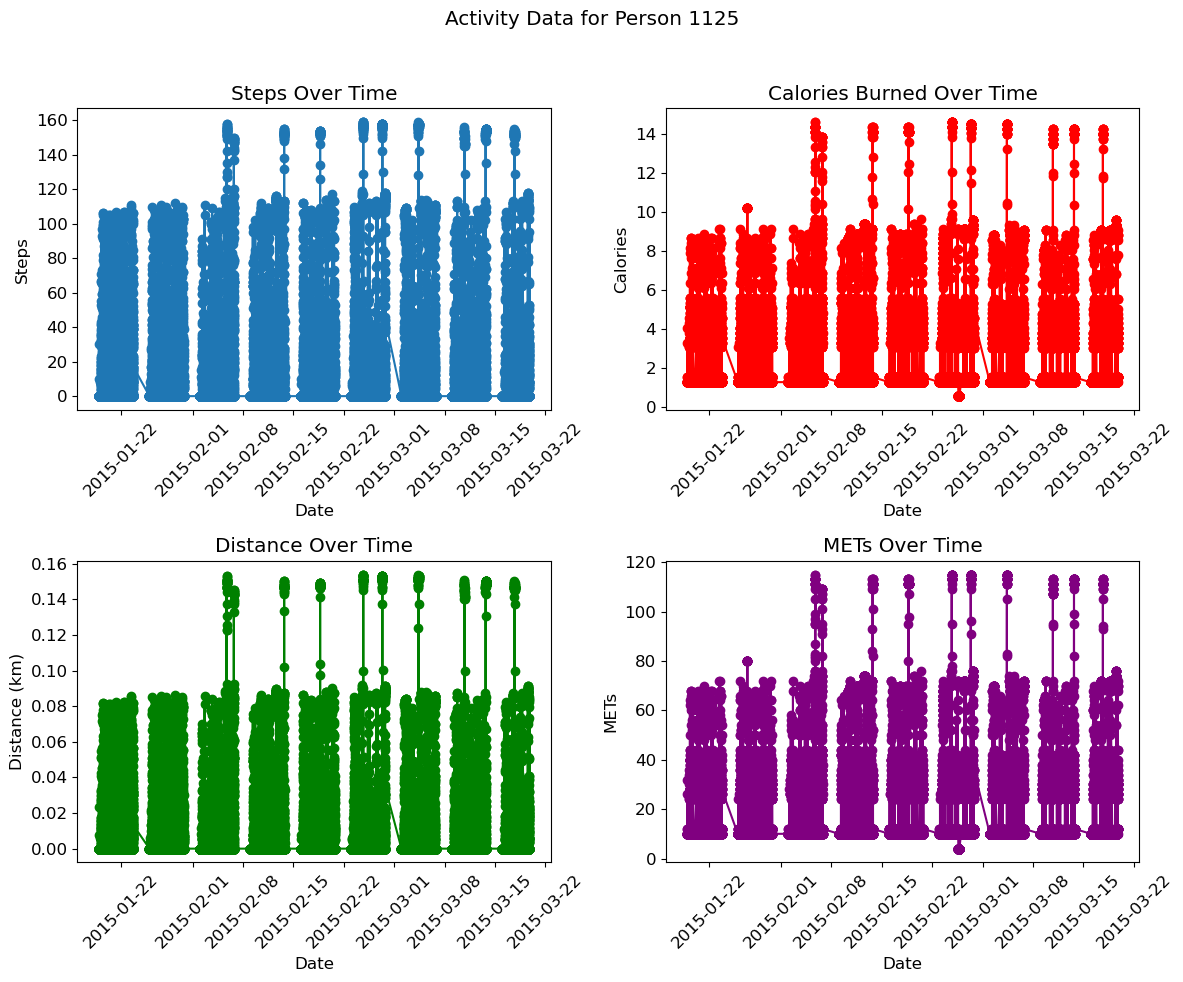

In [150]:
for treatment_id, person_df in df.groupby("treatment_id"):
    print(f"Plotting data for user {treatment_id}")
    plot_person_data(treatment_id, person_df)

### Plot 2: Group Comparison

In [151]:
def plot_group_comparison(df):
    df_summary = df.groupby("treatment_id").agg({
        "steps": "mean",
        "calories": "mean",
        "distance": "mean",
        "mets": "mean"
    }).rename(columns={
        "steps": "Avg Steps",
        "calories": "Avg Calories",
        "distance": "Avg Distance",
        "mets": "Avg METs"
    })

    plot_config = [
        {'y': 'Avg Steps', 'type': 'bar', 'color': 'blue',
            'title': 'Average Steps', 'ylabel': 'Steps', 'xlabel': 'User ID'},
        {'y': 'Avg Calories', 'type': 'bar', 'color': 'red',
            'title': 'Average Calories', 'ylabel': 'Calories', 'xlabel': 'User ID'},
        {'y': 'Avg Distance', 'type': 'bar', 'color': 'green',
            'title': 'Average Distance', 'ylabel': 'Distance (km)', 'xlabel': 'User ID'},
        {'y': 'Avg METs', 'type': 'bar', 'color': 'purple',
            'title': 'Average METs', 'ylabel': 'METs', 'xlabel': 'User ID',
            'xticklabels': df_summary.index}
    ]

    show_sub_plot(
        data=df_summary,
        plot_config=plot_config,
        title="Comparison of Activity Metrics Across Users",
        xticks_rotation=45,
        tight_layout=[0, 0, 1, 0.96],
        plot_type='bar',
        fig_size=(12, 10)
    )

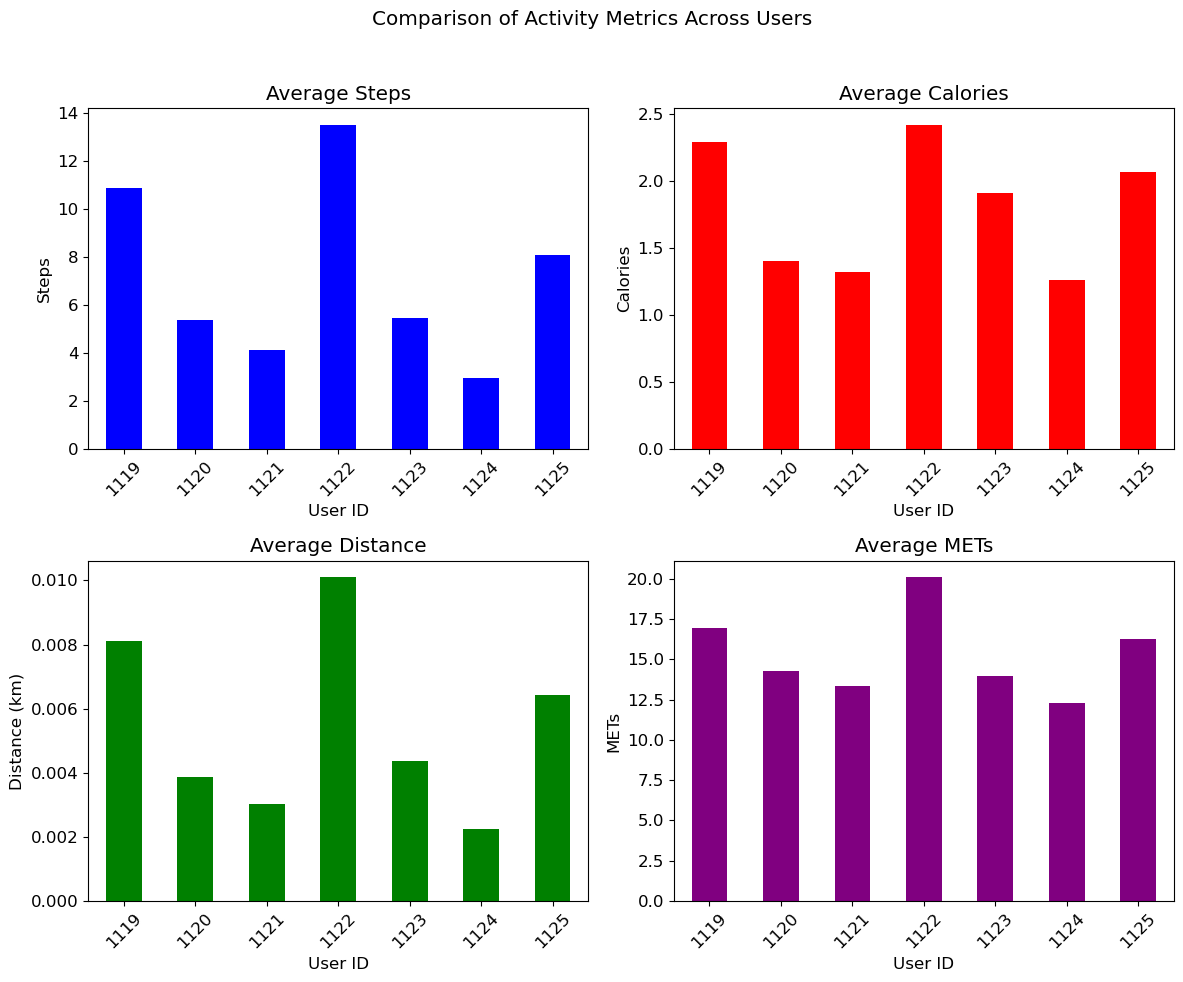

In [152]:
plot_group_comparison(df)

### Plot 3: Individual means

In [153]:
# Compute individual means for steps
individual_means = df.groupby(['treatment_id', df['date'].dt.date])['steps'].mean().reset_index()

In [154]:
# Convert 'date' back to datetime format
individual_means['date'] = pd.to_datetime(individual_means['date'])

In [155]:
treatment_ids = individual_means['treatment_id'].unique()

Plotting data for user 1119


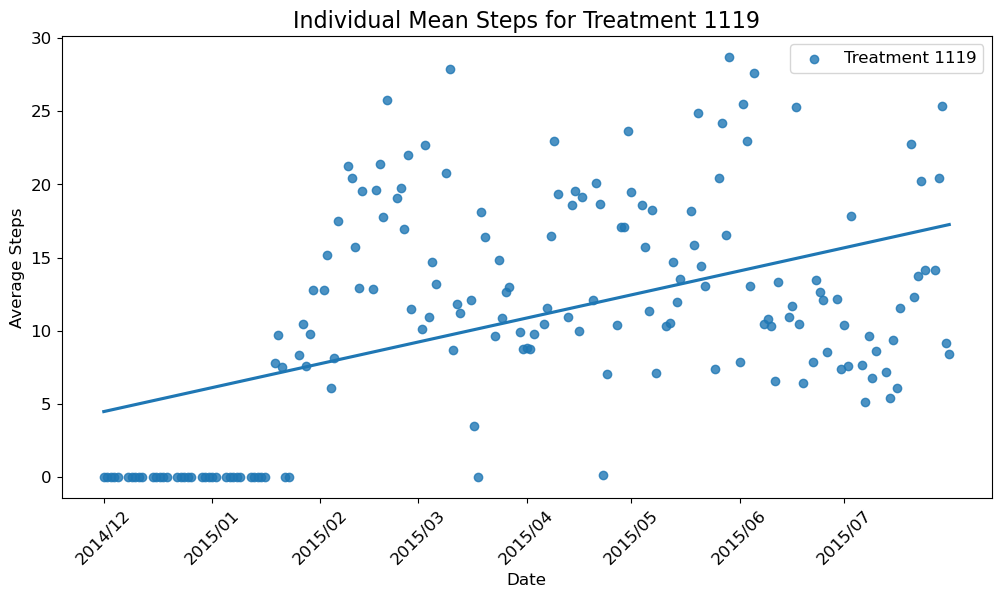

Plotting data for user 1120


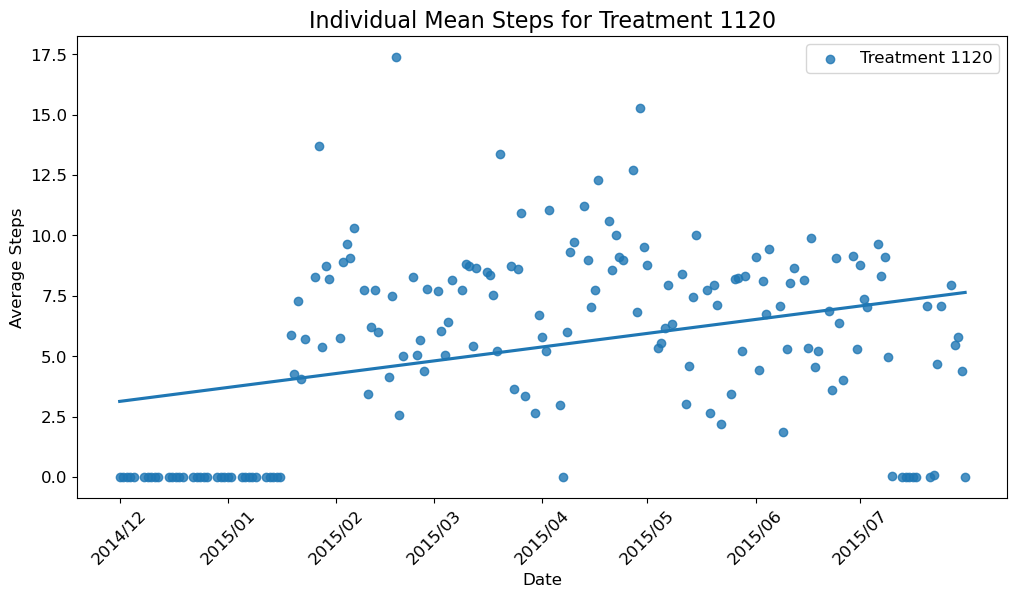

Plotting data for user 1121


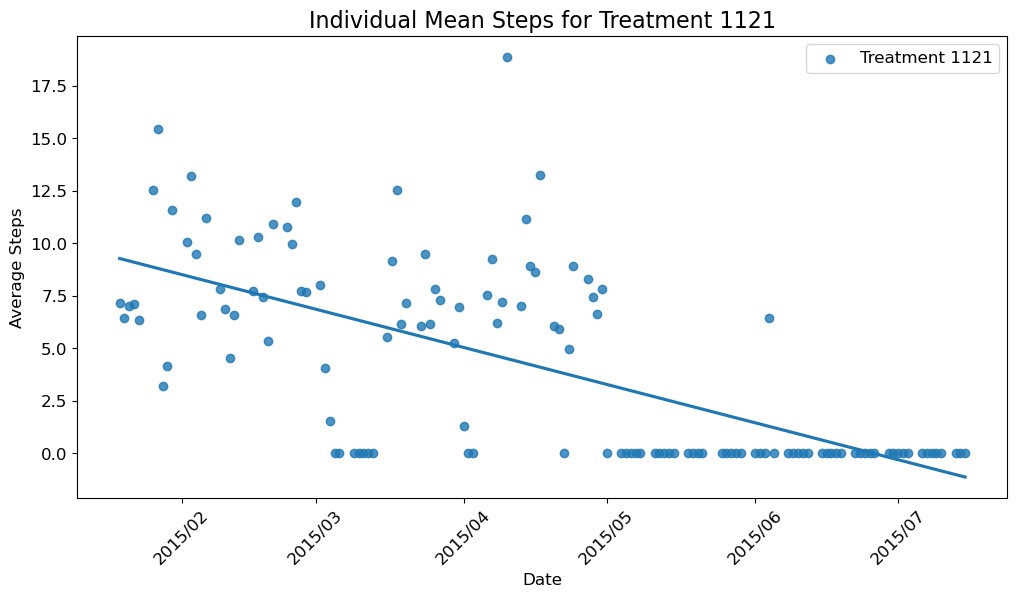

Plotting data for user 1122


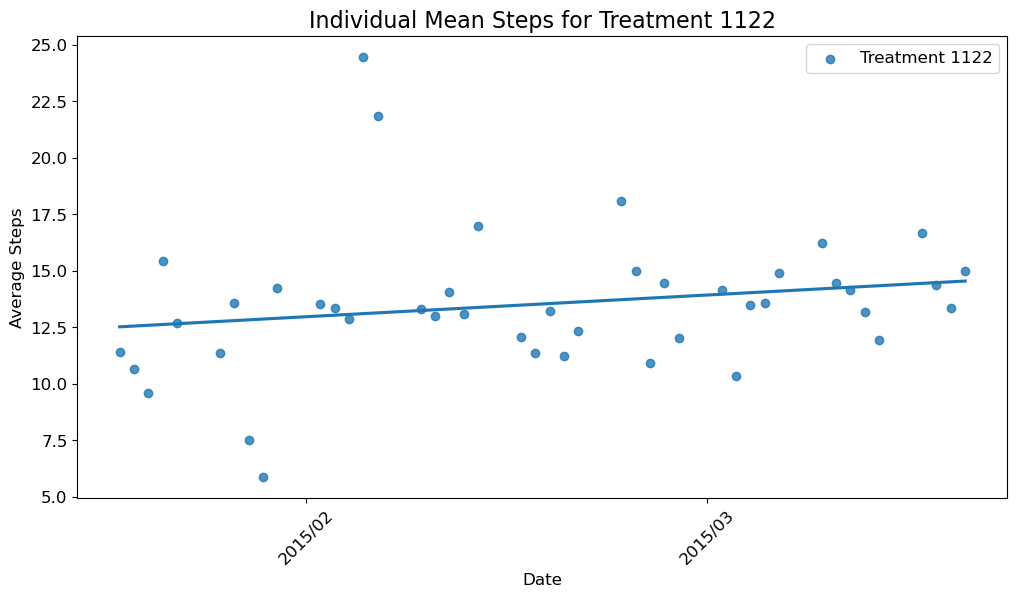

Plotting data for user 1123


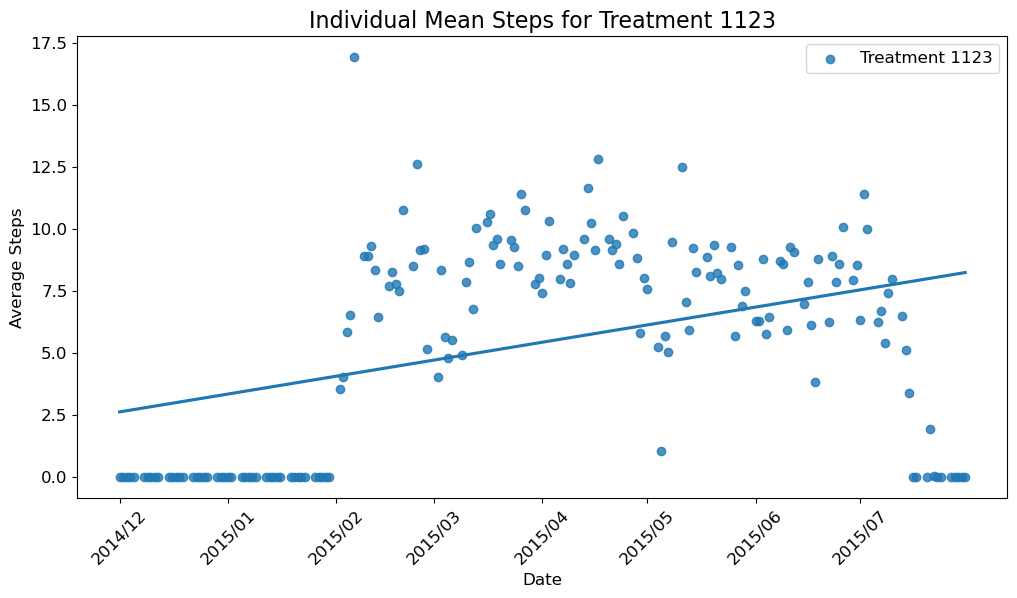

Plotting data for user 1124


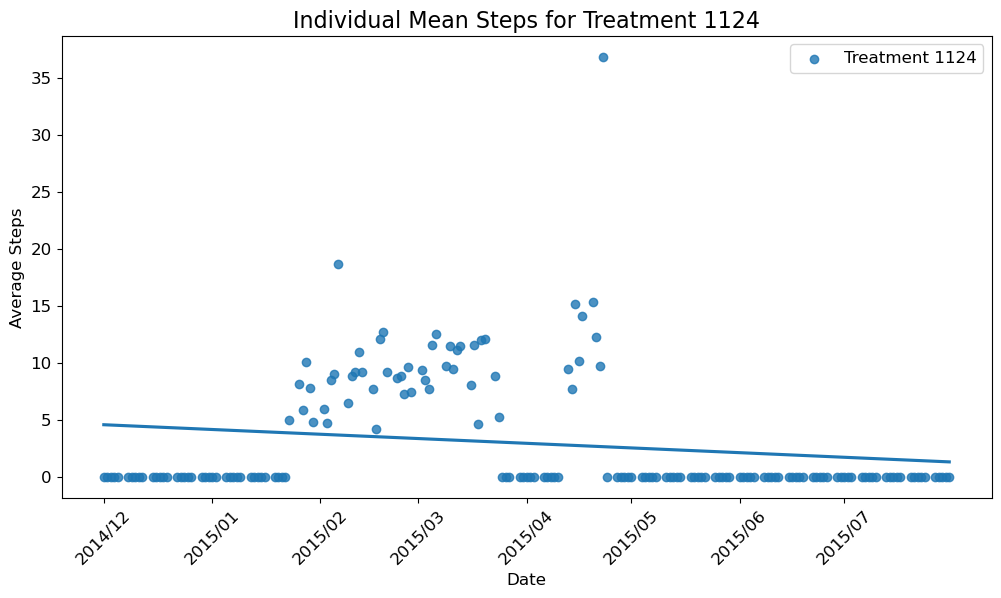

Plotting data for user 1125


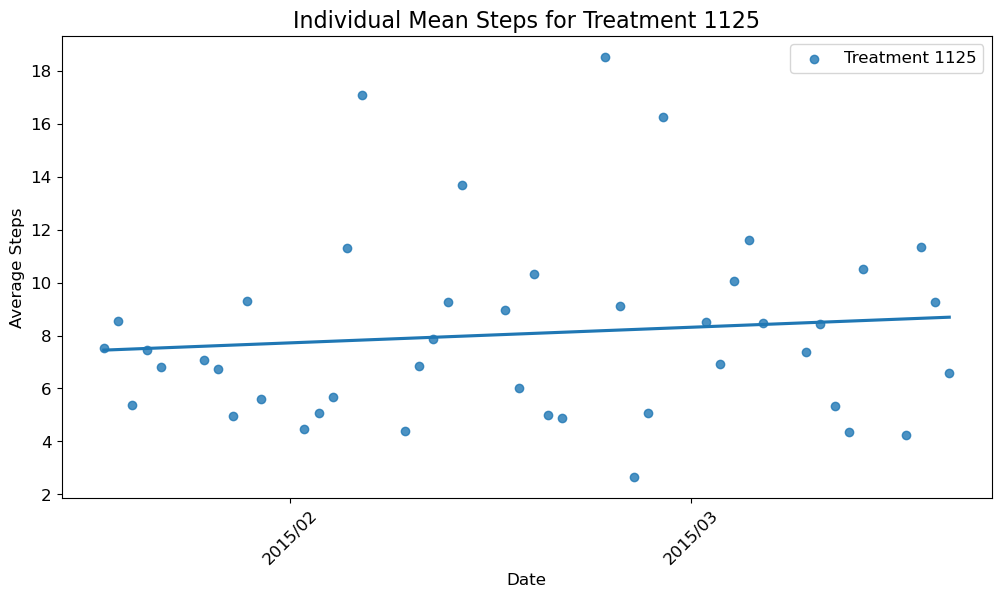

In [156]:
for treatment in treatment_ids:
    print(f"Plotting data for user {treatment}")

    # Filter data for the current treatment_id
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()

    # Convert 'date' to numeric for regression
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days

    # Prepare x-ticks (first day of each month)
    months = pd.date_range(start=subset['date'].min(), end=subset['date'].max(), freq='MS')
    month_numeric = (months - subset['date'].min()).days

    # Use show_plot function with modified label format
    show_plot(
        fig_size=(12, 6),
        reg_plot_data=subset,
        reg_plot_x='date_numeric',
        reg_plot_y='steps',
        reg_plot_scatter=True,
        reg_plot_ci=None,
        reg_plot_label=f'Treatment {treatment}',
        nbr_of_reg_plot=1,
        x_ticks_ticks=month_numeric,
        x_ticks_label=months.strftime('%Y/%m'),
        x_ticks_rotation=45,
        title=f"Individual Mean Steps for Treatment {treatment}",
        x_label="Date",
        y_label="Average Steps",
        legend=True
    )

### Plot 4: Average steps

In [157]:
# Compute the average of all individuals' steps per day
average_steps = df.groupby([df['date'].dt.date])['steps'].mean().reset_index()

In [158]:
# Convert 'date' back to datetime format
average_steps['date'] = pd.to_datetime(average_steps['date'])

In [159]:
# Calculate and print the average number of steps
overall_avg_steps = average_steps['steps'].mean()
print(f"Average number of steps: {overall_avg_steps:.2f} by minute")
print(f"Average number of steps: {overall_avg_steps * 60:.2f} by hour")
print(f"Average number of steps: {overall_avg_steps * 60 * 24:.2f} by day")

Average number of steps: 5.77 by minute
Average number of steps: 346.11 by hour
Average number of steps: 8306.60 by day


Average number of steps by minutes per person at 18:00 on a working day:
treatment_id
1119    10.864331
1120     5.387173
1121     4.116294
1122    13.529545
1123     5.436145
1124     2.957073
1125     8.067763
Name: steps, dtype: float64


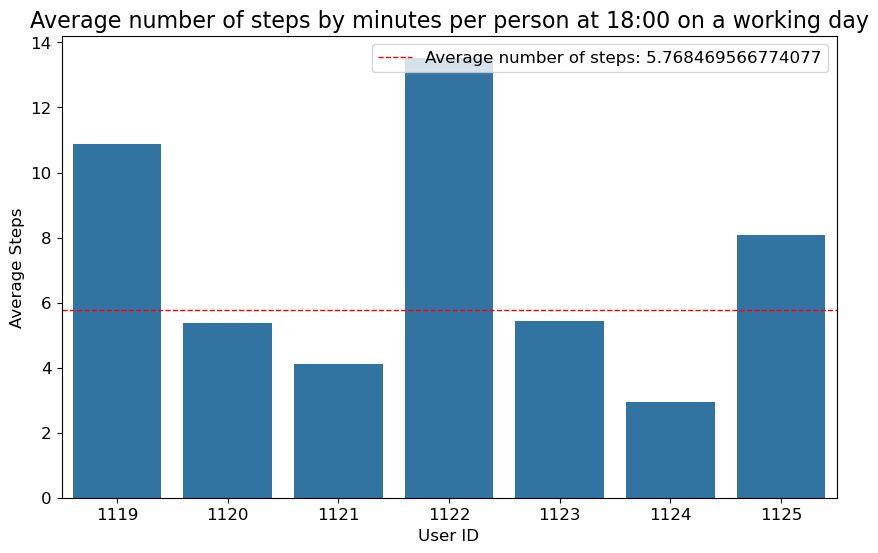

In [160]:
# Calculate the average number of steps per person at 18:00 on a working day
average_steps_per_person = df.groupby('treatment_id')['steps'].mean()
print("Average number of steps by minutes per person at 18:00 on a working day:")
print(average_steps_per_person)

# Plot average steps per user
show_plot(fig_size=(10, 6), title="Average number of steps by minutes per person at 18:00 on a working day",
        x_label="User ID", y_label="Average Steps", bar_plot_x=average_steps_per_person.index,
        bar_plot_y=average_steps_per_person.values, hline_value=overall_avg_steps,
        hline_label=f'Average number of steps: {overall_avg_steps}', legend=True)

Average number of steps by hours per person at 18:00 on a working day:
treatment_id
1119    651.859850
1120    323.230376
1121    246.977621
1122    811.772727
1123    326.168722
1124    177.424361
1125    484.065789
Name: steps, dtype: float64


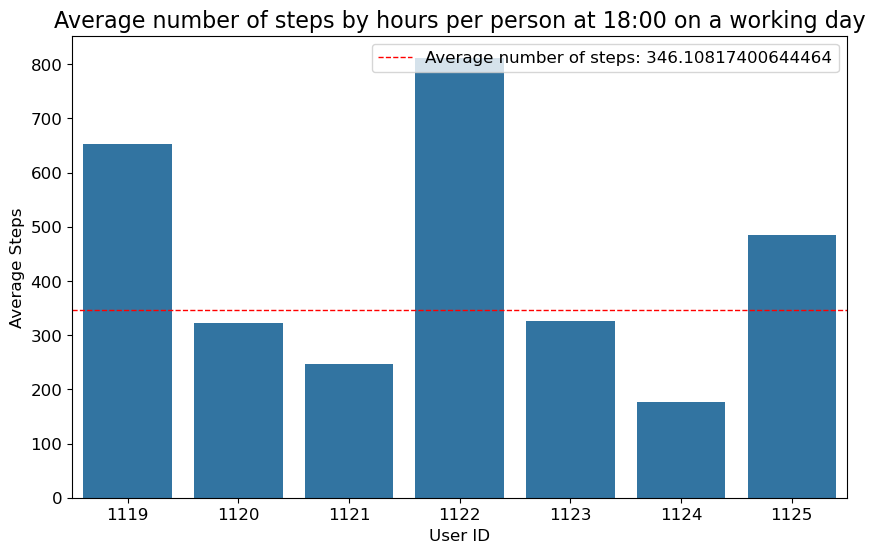

In [161]:
print("Average number of steps by hours per person at 18:00 on a working day:")
average_steps_per_person = average_steps_per_person * 60
print(average_steps_per_person)

show_plot(fig_size=(10, 6), title="Average number of steps by hours per person at 18:00 on a working day",
        x_label="User ID", y_label="Average Steps", bar_plot_x=average_steps_per_person.index,
        bar_plot_y=average_steps_per_person.values, hline_value=overall_avg_steps * 60,
        hline_label=f'Average number of steps: {overall_avg_steps * 60}', legend=True)

Average number of steps by day per person at 18:00 on a working day:
treatment_id
1119    15644.636391
1120     7757.529023
1121     5927.462909
1122    19482.545455
1123     7828.049323
1124     4258.184662
1125    11617.578947
Name: steps, dtype: float64


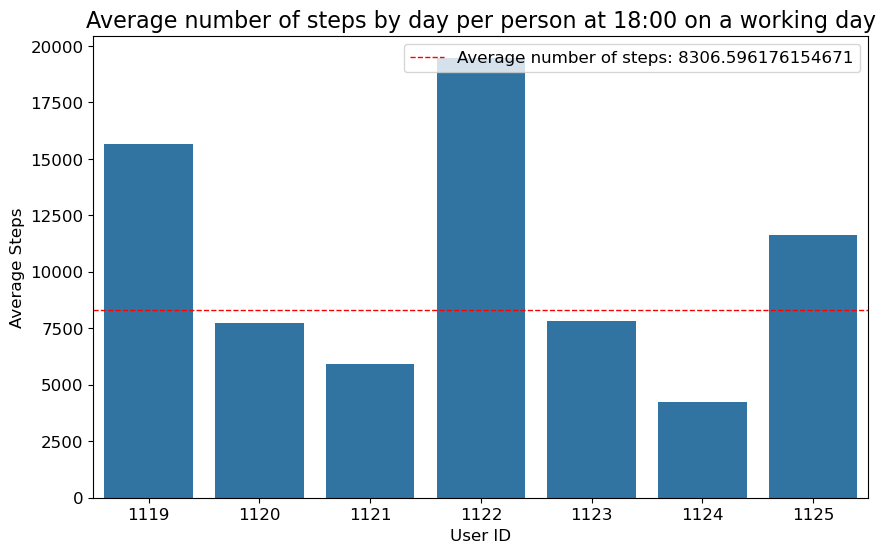

In [162]:
average_steps_per_person = average_steps_per_person * 24
print("Average number of steps by day per person at 18:00 on a working day:")
print(average_steps_per_person)

show_plot(fig_size=(10, 6), title="Average number of steps by day per person at 18:00 on a working day",
        x_label="User ID", y_label="Average Steps", bar_plot_x=average_steps_per_person.index,
        bar_plot_y=average_steps_per_person.values, hline_value=overall_avg_steps * 60 * 24,
        hline_label=f'Average number of steps: {overall_avg_steps * 60 * 24}', legend=True)

### Plot 5: Average steps for all treatment groups

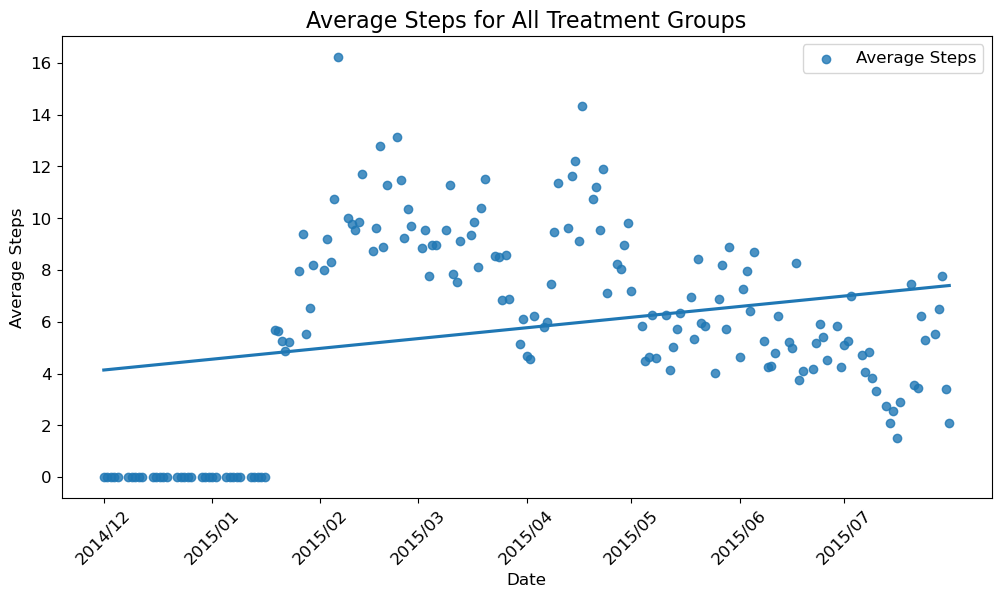

In [163]:
# Convert 'date' to numeric for regression
average_steps['date_numeric'] = (average_steps['date'] - average_steps['date'].min()).dt.days

# Prepare x-ticks (first day of each month)
months = pd.date_range(start=average_steps['date'].min(), end=average_steps['date'].max(), freq='MS')
month_numeric = (months - average_steps['date'].min()).days

# Use show_plot function with modified label format
show_plot(
    fig_size=(12, 6),
    reg_plot_data=average_steps,
    reg_plot_x='date_numeric',
    reg_plot_y='steps',
    reg_plot_scatter=True,
    reg_plot_ci=None,
    reg_plot_label='Average Steps',
    nbr_of_reg_plot=1,
    x_ticks_ticks=month_numeric,
    x_ticks_label=months.strftime('%Y/%m'),
    x_ticks_rotation=45,
    title="Average Steps for All Treatment Groups",
    x_label="Date",
    y_label="Average Steps",
    legend=True
)

### Plot 6: Individual plots with average steps superposed

Plotting data for user 1119


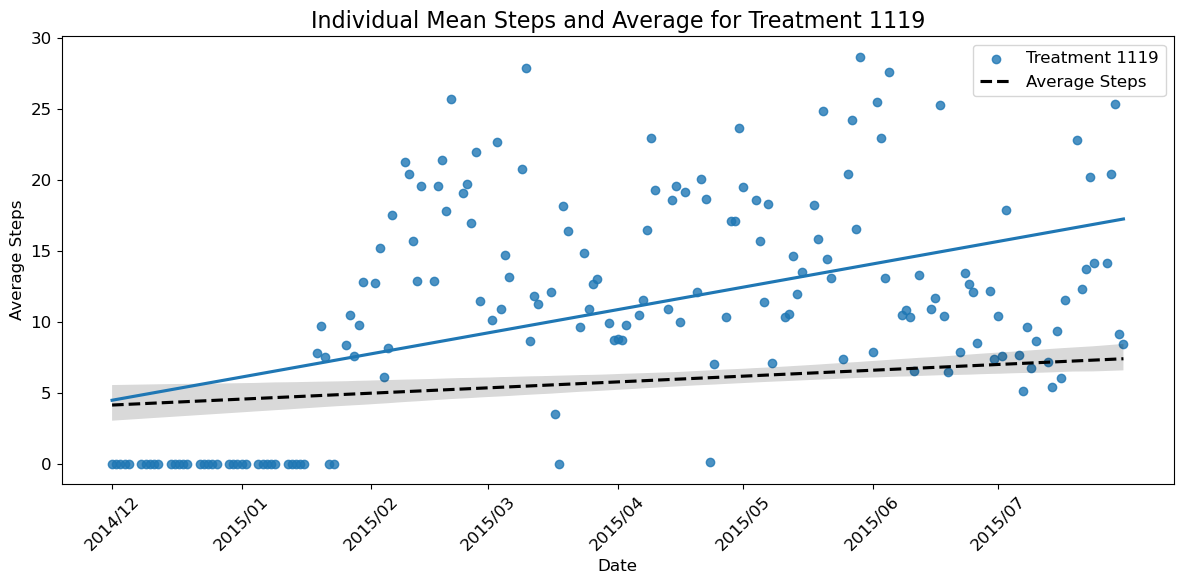

Plotting data for user 1120


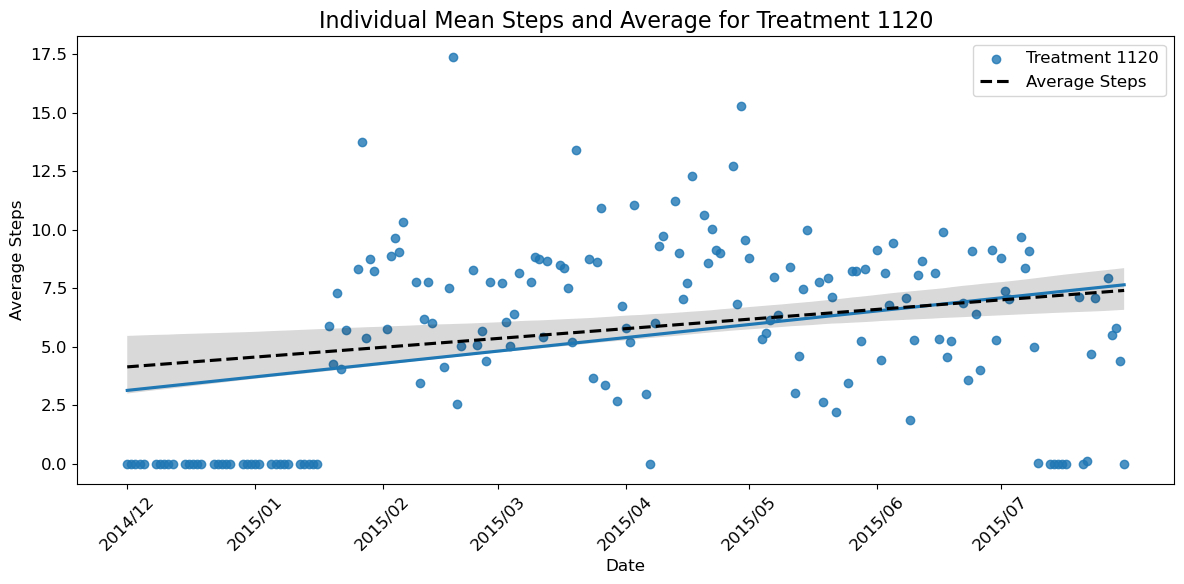

Plotting data for user 1121


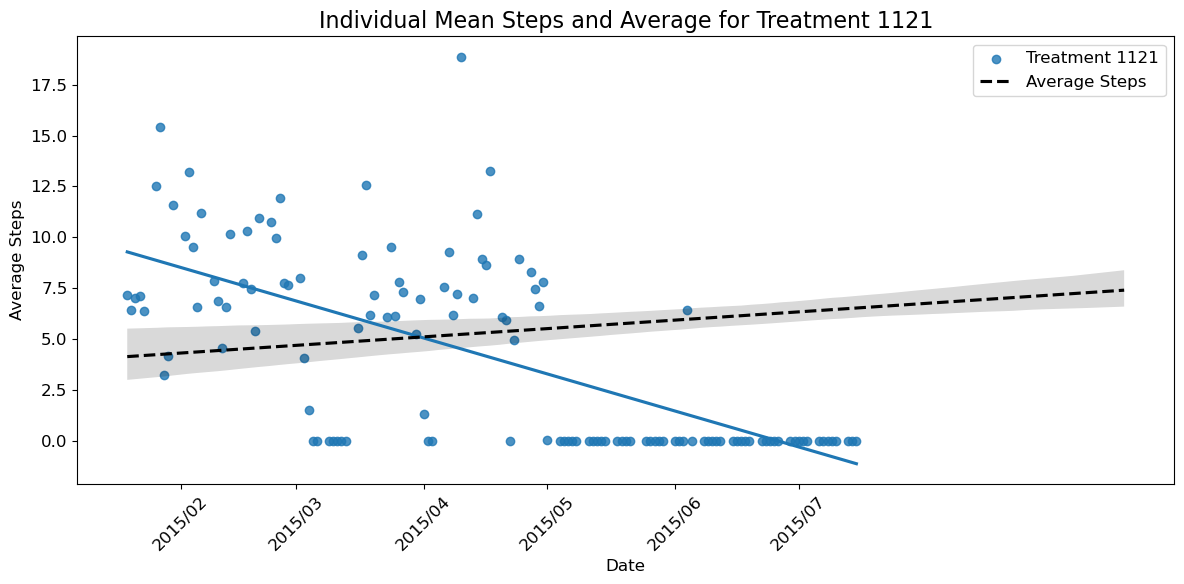

Plotting data for user 1122


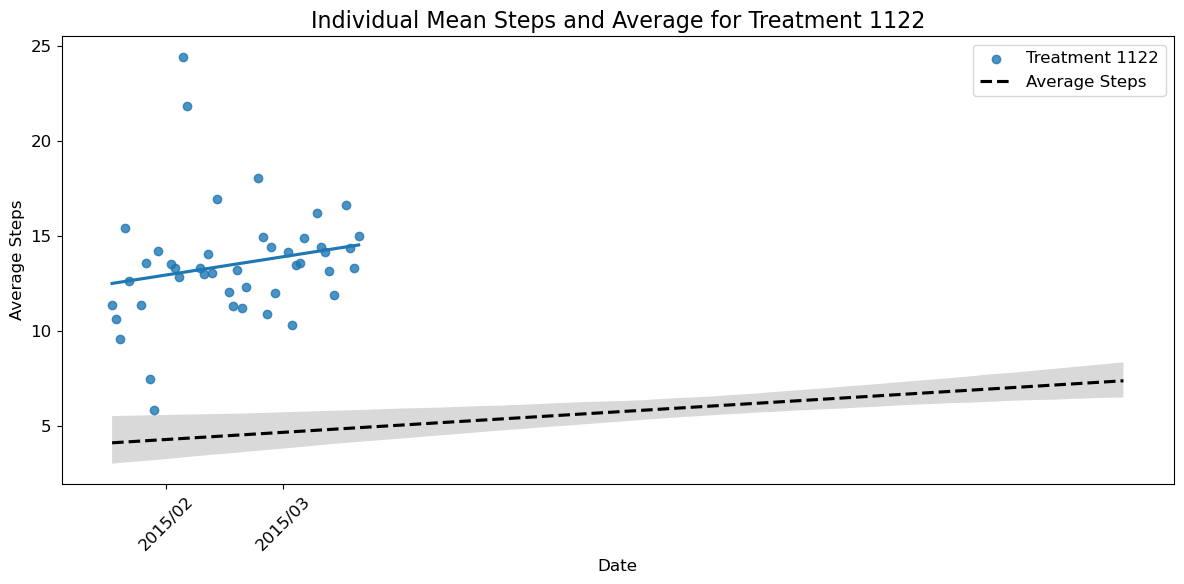

Plotting data for user 1123


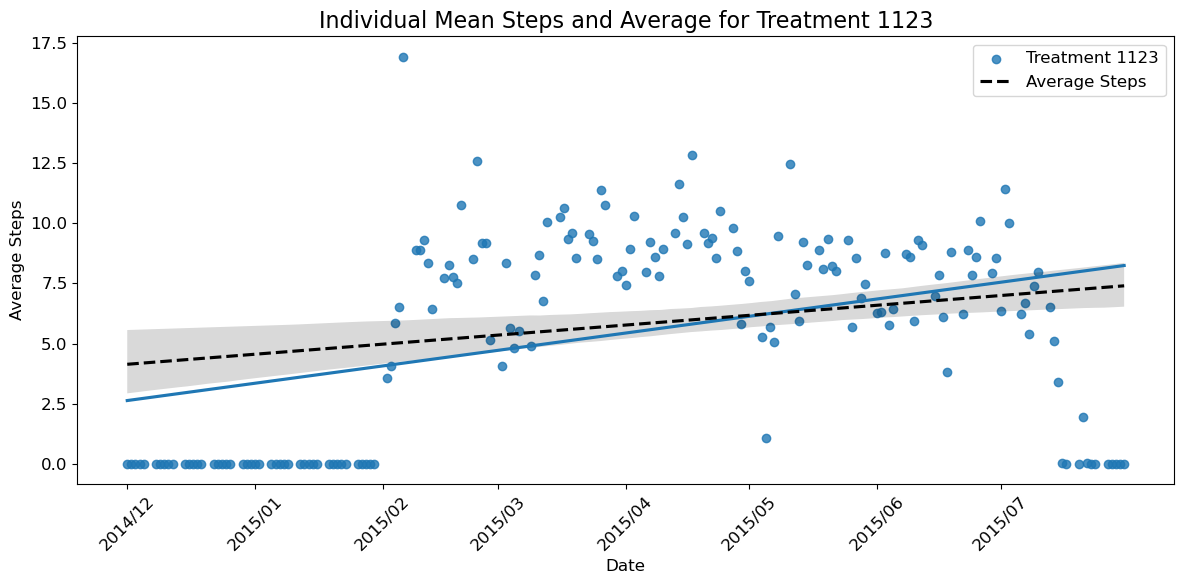

Plotting data for user 1124


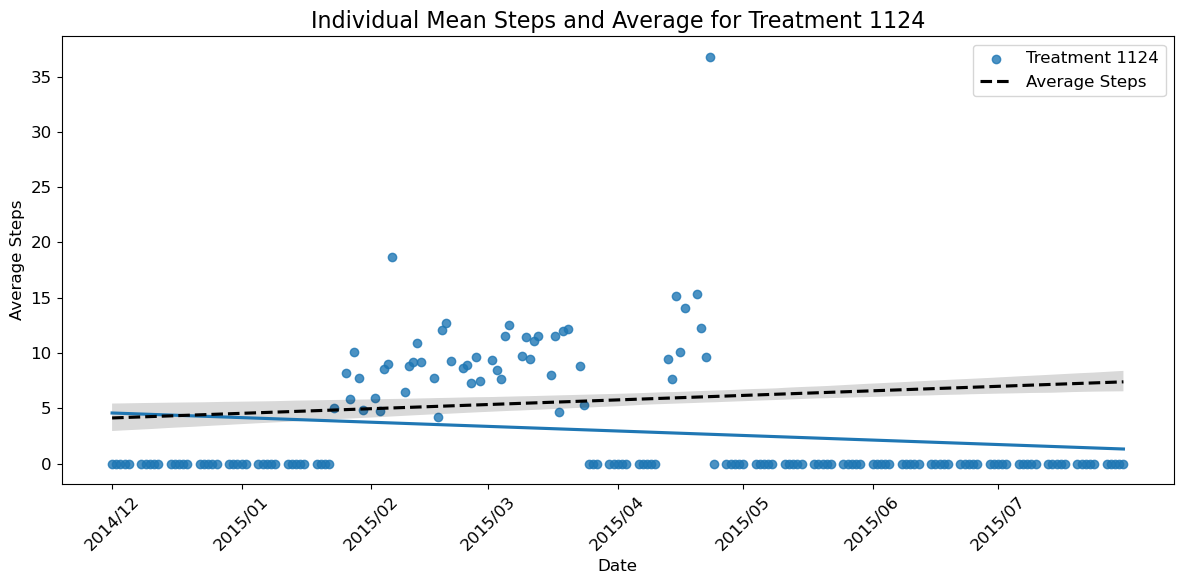

Plotting data for user 1125


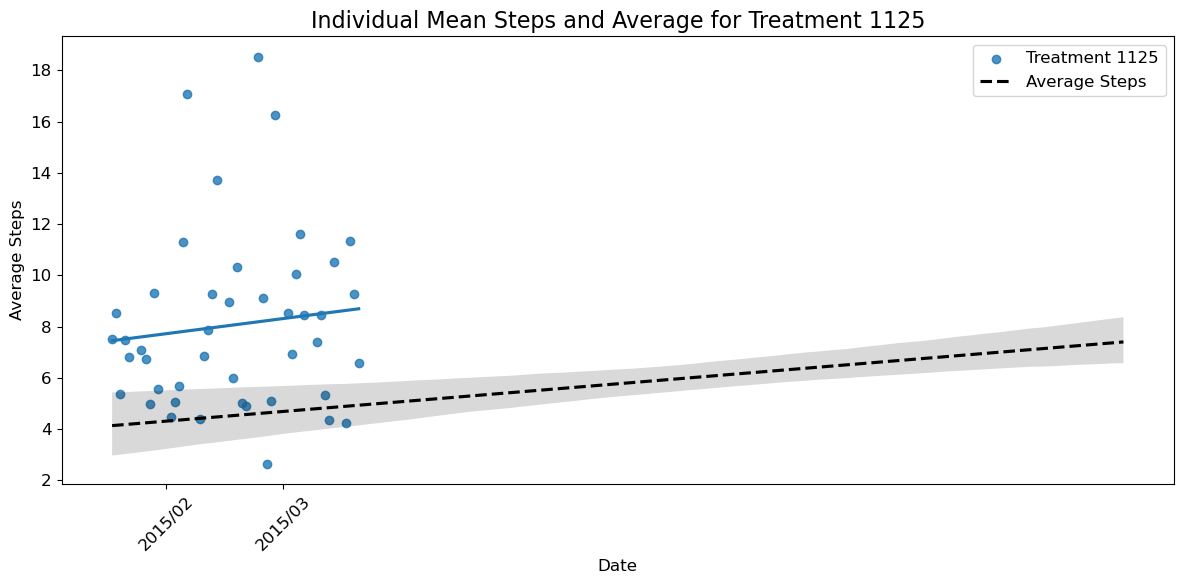

In [164]:
for treatment in treatment_ids:
    print(f"Plotting data for user {treatment}")

    # Filter data for the current treatment_id
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()

    # Convert 'date' to numeric values for regression analysis
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days

    # Prepare x-axis ticks (first day of each month)
    months = pd.date_range(start=subset['date'].min(), end=subset['date'].max(), freq='MS')
    month_numeric = (months - subset['date'].min()).days

    # Use show_plot function with both regression lines
    show_plot(
        fig_size=(12, 6),
        reg_plot_data=[subset, average_steps],  # List of both datasets
        reg_plot_x=['date_numeric', 'date_numeric'],  # List of both x variables
        reg_plot_y=['steps', 'steps'],  # List of both y variables
        reg_plot_scatter=[True, False],  # Scatter points for 1st, line only for 2nd
        reg_plot_ci=[None, 95],  # No confidence interval for either
        reg_plot_label=[
            f'Treatment {treatment}',  # Label with treatment ID
            'Average Steps'           # Label for average
        ],
        reg_plot_color=[None, 'black'],  # Default color for 1st, black for 2nd
        reg_plot_line_kws=[
            None,  # No special styling for first regression
            {'color': 'black', 'linestyle': '--'}  # Style for the average line
        ],
        nbr_of_reg_plot=2,  # Two regression lines
        x_ticks_ticks=month_numeric,
        x_ticks_label=months.strftime('%Y/%m'),
        x_ticks_rotation=45,
        title=f"Individual Mean Steps and Average for Treatment {treatment}",
        x_label="Date",
        y_label="Average Steps",
        legend=True,
        tight_layout=[0, 0, 1, 1]  # Layout adjustment to prevent clipping
    )

### Plot 7: Superposed individuals and average steps

In [165]:
# Define a list of colors manually (you peux ajouter plus si nécessaire)
treatment_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [166]:
# Make sure there are enough colors for the number of treatment IDs
if len(treatment_ids) > len(treatment_colors):
    raise ValueError("Not enough colors for the number of treatment IDs!")

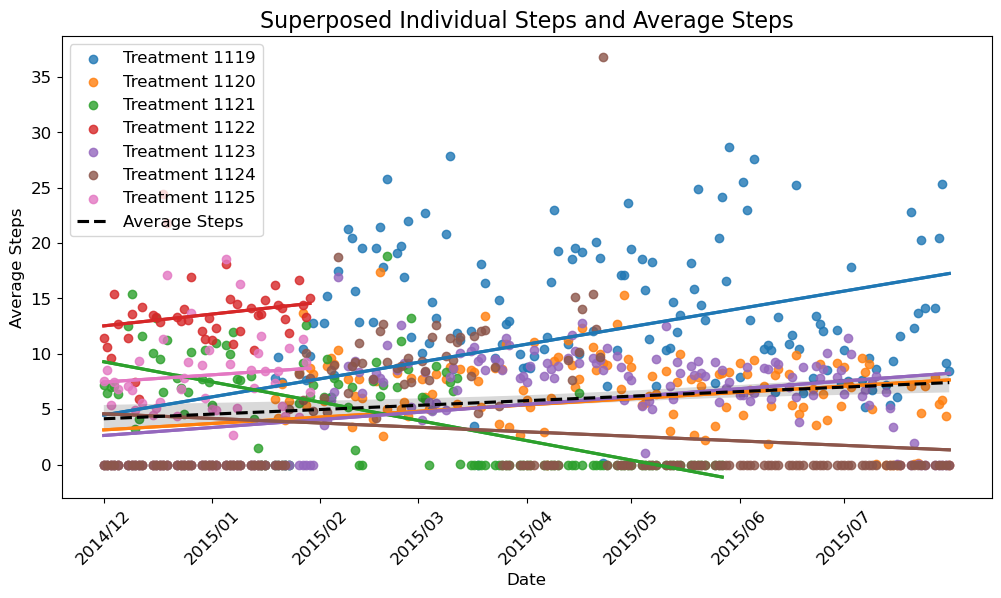

In [167]:
# Prepare common elements
months = pd.date_range(start=average_steps['date'].min(), end=average_steps['date'].max(), freq='MS')
month_numeric = (months - average_steps['date'].min()).days

# Prepare data for show_plot
reg_plot_data = []
reg_plot_x = []
reg_plot_y = []
reg_plot_scatter = []
reg_plot_ci = []
reg_plot_label = []
reg_plot_color = []
reg_plot_line_kws = []

# Loop through each treatment_id
for i, treatment in enumerate(treatment_ids):
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days

    # Add scatter plot parameters
    reg_plot_data.append(subset)
    reg_plot_x.append('date_numeric')
    reg_plot_y.append('steps')
    reg_plot_scatter.append(True)  # Show points
    reg_plot_ci.append(None)       # No confidence interval for scatter
    reg_plot_label.append(f'Treatment {treatment}')
    reg_plot_color.append(treatment_colors[i])
    reg_plot_line_kws.append(None)

    # Add regression line parameters
    reg_plot_data.append(subset)
    reg_plot_x.append('date_numeric')
    reg_plot_y.append('steps')
    reg_plot_scatter.append(False)  # Hide points (already shown)
    reg_plot_ci.append(None)        # No confidence interval
    reg_plot_label.append(None)     # No label (already in scatter)
    reg_plot_color.append(treatment_colors[i])
    reg_plot_line_kws.append(None)

# Add average steps line
reg_plot_data.append(average_steps)
reg_plot_x.append('date_numeric')
reg_plot_y.append('steps')
reg_plot_scatter.append(False)
reg_plot_ci.append(95)
reg_plot_label.append('Average Steps')
reg_plot_color.append('black')
reg_plot_line_kws.append({'color': 'black', 'linestyle': '--'})

# Calculate total number of plots (2 per treatment + 1 average)
nbr_of_reg_plot = len(treatment_ids) * 2 + 1

# Show the plot using your function
show_plot(
    fig_size=(12, 6),
    reg_plot_data=reg_plot_data,
    reg_plot_x=reg_plot_x,
    reg_plot_y=reg_plot_y,
    reg_plot_scatter=reg_plot_scatter,
    reg_plot_ci=reg_plot_ci,
    reg_plot_label=reg_plot_label,
    reg_plot_color=reg_plot_color,
    reg_plot_line_kws=reg_plot_line_kws,
    nbr_of_reg_plot=nbr_of_reg_plot,
    x_ticks_ticks=month_numeric,
    x_ticks_label=months.strftime('%Y/%m'),
    x_ticks_rotation=45,
    title="Superposed Individual Steps and Average Steps",
    x_label="Date",
    y_label="Average Steps",
    legend=True
)

### Plot 8: Hourly Activity Patterns

In [168]:
print("\nPLOT 8: Hourly Activity Patterns")


PLOT 8: Hourly Activity Patterns


In [169]:
def plot_hourly_patterns(df):
    df['hour'] = df['date'].dt.hour
    hourly_activity = df.groupby(['treatment_id', 'hour']).agg({
        'steps': 'mean',
        'calories': 'mean'
    }).reset_index()

    show_plot(
        fig_size=(14, 6),
        title='Average Steps by Hour of Day',
        x_label='Hour of Day',
        y_label='Average Steps',
        x_ticks_ticks=range(0, 24),
        x_ticks_label=range(0, 24),
        legend=True,
        legend_title='User ID',
        grid=True,

        # Use the new line plot parameters
        line_plot_data=hourly_activity,
        line_plot_x='hour',
        line_plot_y='steps',
        line_plot_hue='treatment_id'
    )

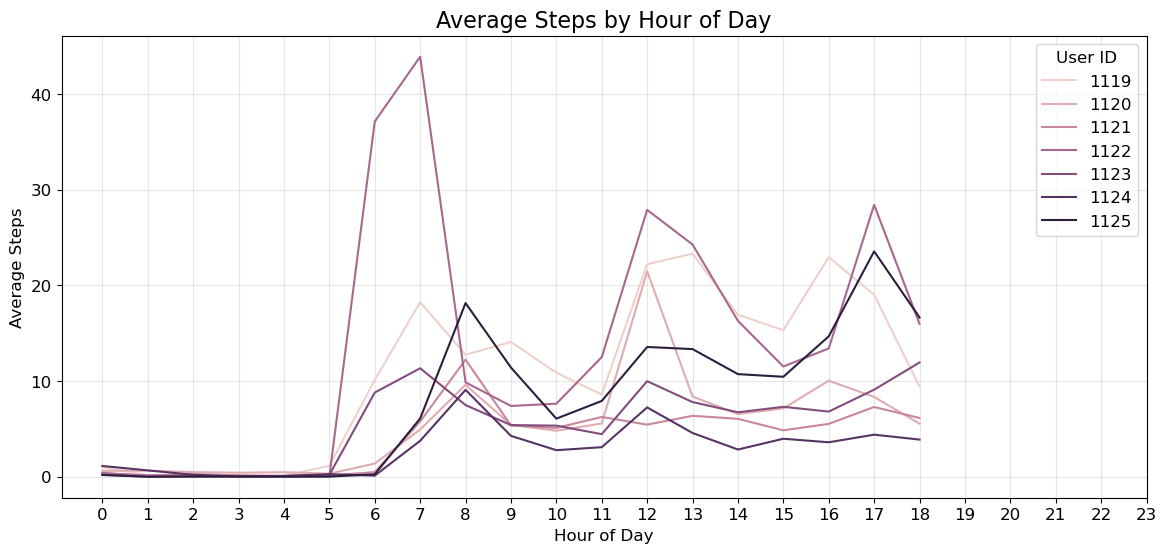

In [170]:
plot_hourly_patterns(df)

### Plot 9: Weekly Activity Patterns

In [171]:
print("\nPLOT 9: Weekly Activity Patterns")


PLOT 9: Weekly Activity Patterns


In [172]:
def plot_weekly_patterns(df):
    df['weekday'] = df['date'].dt.day_name()
    df['hour'] = df['date'].dt.hour

    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    df['weekday'] = pd.Categorical(df['weekday'], categories=weekdays, ordered=True)

    plot_config = [{
        'x': 'hour',
        'y': 'steps',
        'hue': 'treatment_id',
        'xlabel': 'Hour of Day',
        'ylabel': 'Average Steps'
    }]

    show_sub_plot(
        data=df,
        plot_config=plot_config,
        title='Average Hourly Steps by Weekday',
        facet_col='weekday',
        facet_col_wrap=3,
        facet_height=4,
        facet_aspect=1.2,
        title_y=1.02,
    )

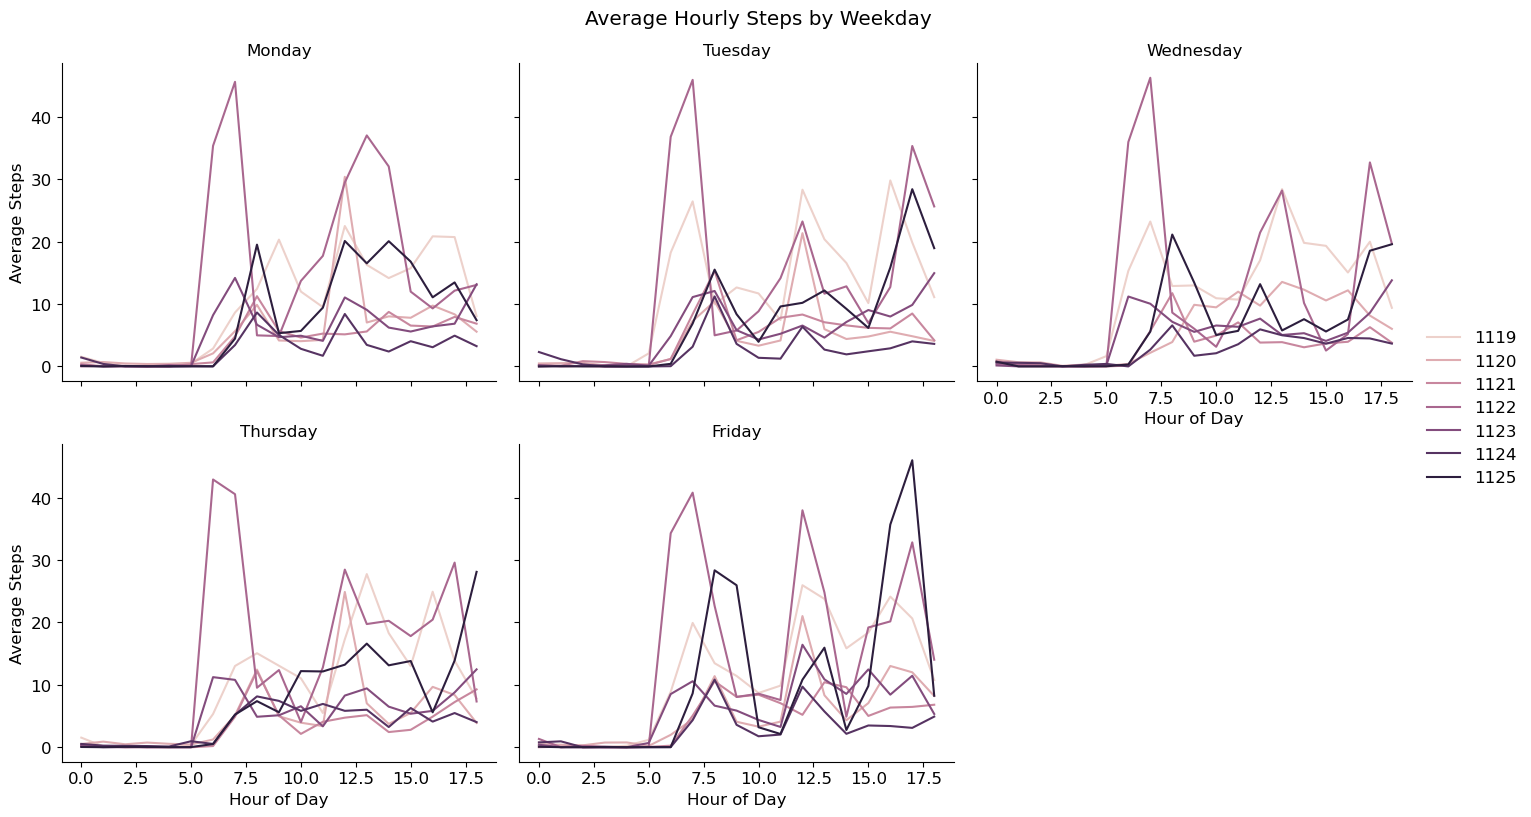

In [173]:
plot_weekly_patterns(df)

### Plot 10: Correlation Analysis

In [174]:
print("\nPLOT 10: Correlation Analysis")
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
corr = corr.dropna(axis=1, how='all').dropna(axis=0, how='all')


PLOT 10: Correlation Analysis


In [175]:
threshold = 0.1
mask = (corr.abs() < threshold).sum(axis=0) == (corr.shape[0] - 1)
low_correlation_cols = corr.columns[mask]
corr = corr.drop(columns=low_correlation_cols, index=low_correlation_cols)

In [176]:
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
              treatment_id     fitbit_id  calories      mets     level  \
treatment_id  1.000000e+00  4.945362e-01 -0.080300 -0.073930 -0.056890   
fitbit_id     4.945362e-01  1.000000e+00 -0.114261 -0.074379 -0.069105   
calories     -8.030042e-02 -1.142606e-01  1.000000  0.979681  0.932637   
mets         -7.392993e-02 -7.437892e-02  0.979681  1.000000  0.956270   
level        -5.688984e-02 -6.910522e-02  0.932637  0.956270  1.000000   
steps        -7.646324e-02 -6.159998e-02  0.951678  0.964365  0.906122   
distance     -6.866567e-02 -6.134644e-02  0.953724  0.963528  0.903404   
hour          4.707637e-14  2.762873e-14  0.196777  0.205912  0.201932   

                 steps  distance          hour  
treatment_id -0.076463 -0.068666  4.707637e-14  
fitbit_id    -0.061600 -0.061346  2.762873e-14  
calories      0.951678  0.953724  1.967773e-01  
mets          0.964365  0.963528  2.059120e-01  
level         0.906122  0.903404  2.019316e-01  
steps         1.000

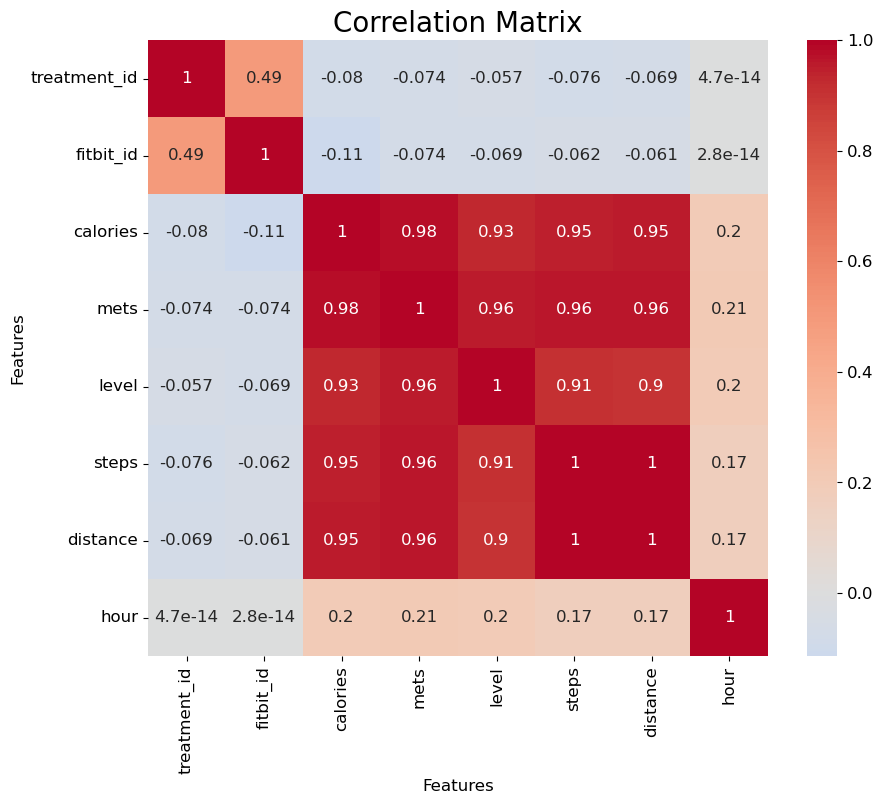

In [177]:
show_plot(fig_size=(10, 8), title="Correlation Matrix", x_label="Features",
        y_label="Features", heatmap_data=corr, heatmap_annot=True,
        heatmap_cmap='coolwarm', heatmap_center=0, tile_font_size=20)

### Plot 11: Feature Relationships DAG

In [178]:
print("\nPLOT 11: Feature Relationships DAG")
dag = nx.DiGraph()
dag_features = ['date', 'working_days', 'calories', 'mets', 'level', 'steps', 'distance', 'season']
dag.add_nodes_from(dag_features)


PLOT 11: Feature Relationships DAG


In [179]:
edges = [
    ('date', 'working_days'),
    ('date', 'season'),
    ('working_days', 'steps'),
    ('season', 'steps'),
    ('steps', 'calories'),
    ('steps', 'mets'),
    ('steps', 'level'),
    ('steps', 'distance'),
]

dag.add_edges_from(edges)

In [180]:
pos = {
    'date': (0, 1),
    'working_days': (-1, 0),
    'calories': (-1, -1),
    'mets': (0, -1),
    'season': (1, 0),
    'steps': (0, 0),
    'distance': (-1, -2),
    'level': (1, -2)
}

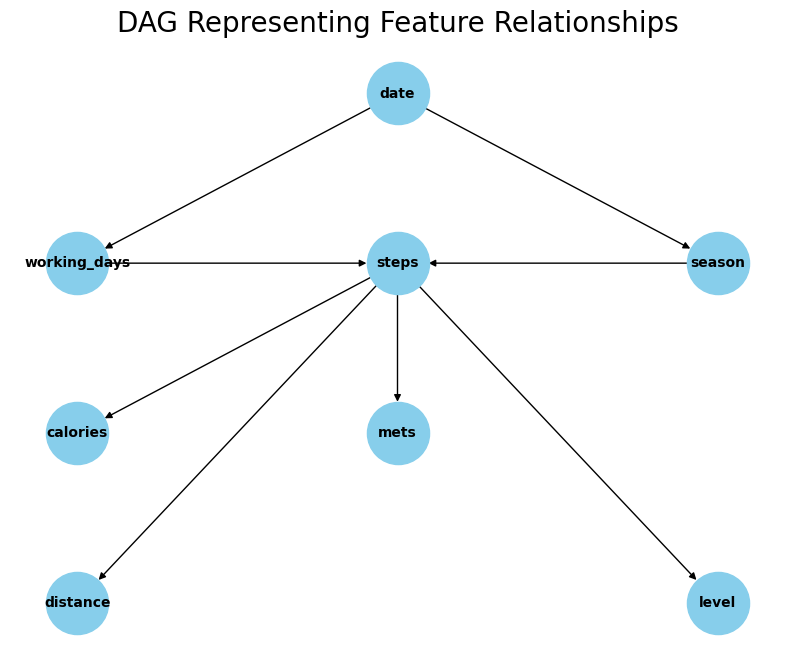

In [181]:
show_plot(fig_size=(10, 8), title="DAG Representing Feature Relationships",
        tile_font_size=20, dag_graph=dag, dag_pos=pos,
        dag_with_labels=True, dag_node_size=2000, dag_node_color="skyblue",
        dag_node_font_size=10, dag_font_weight='bold', dag_edge_color='black')

In [182]:
print("Exploratory data analysis complete!\n")

Exploratory data analysis complete!



## Step 5: Feature Engineering

In [183]:
print("STEP 5: Feature engineering...")

STEP 5: Feature engineering...


In [184]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [185]:
print("Adding temporal features...")
df['season'] = df['date'].apply(get_season)
df['hour'] = df['date'].dt.hour
df['is_weekend'] = df['date'].dt.weekday >= 5
df['cumulative_steps'] = df.groupby(['treatment_id', df['date'].dt.date])['steps'].cumsum()
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month

Adding temporal features...


In [186]:
print("Creating target variable...")
df['target'] = 0
for user_id, user_avg in df[df['date'].dt.hour <= 18].groupby('treatment_id')['cumulative_steps'].mean().items():
    mask = (df['treatment_id'] == user_id) & (df['date'].dt.hour <= 18)
    df.loc[mask, 'target'] = (df.loc[mask, 'cumulative_steps'] >= user_avg).astype(int)

Creating target variable...


In [187]:
print("Creating one-hot encoded features...")
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    df[f'season_{season}'] = (df['season'] == season).astype(int)

Creating one-hot encoded features...


In [188]:
print("Adding derived features...")
df['steps_per_hour'] = df['cumulative_steps'] / (df['hour'] + 1)
overall_avg_steps = df['steps'].mean()
df['steps_remaining'] = (overall_avg_steps * 60 * 24) - df['cumulative_steps']
df['hours_remaining'] = 18 - df['hour']
df['required_pace'] = df['steps_remaining'] / (df['hours_remaining'] + 0.1)

Adding derived features...


In [189]:
features = [
    'hour', 'is_weekend', 'cumulative_steps', 'steps_per_hour',
    'steps_remaining', 'hours_remaining', 'required_pace',
    'season_Spring', 'season_Summer', 'season_Autumn', 'season_Winter',
    'month'
]

In [190]:
print("Final feature set:")
print(features)

Final feature set:
['hour', 'is_weekend', 'cumulative_steps', 'steps_per_hour', 'steps_remaining', 'hours_remaining', 'required_pace', 'season_Spring', 'season_Summer', 'season_Autumn', 'season_Winter', 'month']


In [191]:
print("Cleaning data...")
df_clean = df.dropna(subset=features).copy()
print(f"Clean dataset shape: {df_clean.shape}")

Cleaning data...
Clean dataset shape: (1043100, 25)


In [192]:
print("Feature engineering complete!\n")

Feature engineering complete!



## Step 6: Model Training

In [193]:
print("STEP 6: Model training and evaluation...")

STEP 6: Model training and evaluation...


In [194]:
label_map = {0: "Not Reached", 1: "Reached"}  # Assuming 1 = Success/Event Occurred

In [195]:
print("Splitting data into train and test sets...")
train_users, test_users = train_test_split(df_clean['treatment_id'].unique(), test_size=0.3, random_state=42)
train_data = df_clean[df_clean['treatment_id'].isin(train_users)]
test_data = df_clean[df_clean['treatment_id'].isin(test_users)]

Splitting data into train and test sets...


In [196]:
print("\nUser IDs for training:", train_users)
print("User IDs for testing:", test_users)


User IDs for training: [1121 1123 1122 1125]
User IDs for testing: [1119 1120 1124]


In [197]:
X_train = train_data[features]
y_train = train_data['target']
X_test = test_data[features]
y_test = test_data['target']

In [198]:
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True).rename(label_map))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True).rename(label_map))


Class distribution in training set:
target
Not Reached    0.649993
Reached        0.350007
Name: proportion, dtype: float64

Class distribution in test set:
target
Not Reached    0.71801
Reached        0.28199
Name: proportion, dtype: float64


In [199]:
print("\nTraining model with SMOTE...")


Training model with SMOTE...



Model evaluation on test set:
Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

 Not Reached       0.99      0.97      0.98    429729
     Reached       0.92      0.97      0.95    168771

   macro avg       0.96      0.97      0.96    598500
weighted avg       0.97      0.97      0.97    598500



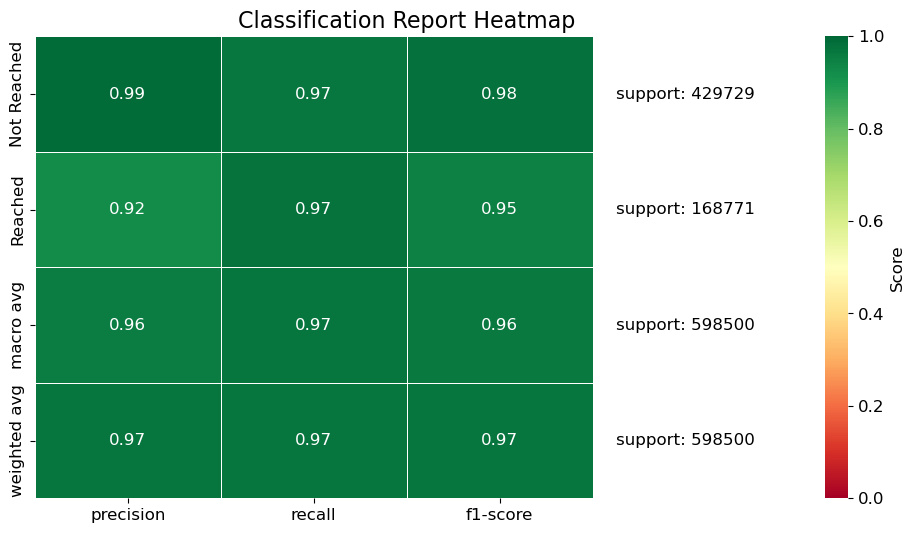

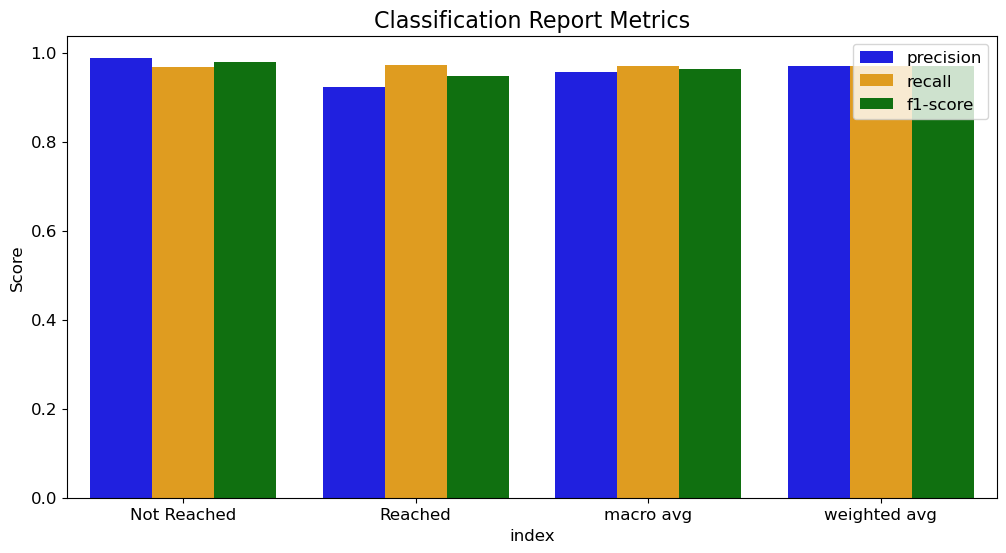

In [200]:
try:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train)

    model = RandomForestClassifier(random_state=42, class_weight='balanced',
                                    n_estimators=200, min_samples_leaf=5, max_depth=10)
    model.fit(X_res, y_res)

    print("\nModel evaluation on test set:")
    y_pred = model.predict(X_test)

    # Apply label_map to y_test and y_pred for reporting
    y_test_mapped = y_test.map(label_map)
    y_pred_mapped = pd.Series(y_pred).map(label_map)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    # Generate classification report with mapped labels
    report = classification_report(y_test_mapped, y_pred_mapped, output_dict=True)
    report.pop("accuracy", None)  # Remove accuracy if not needed
    report_text = classification_report(y_test_mapped, y_pred_mapped, output_dict=False)

    # Filter out accuracy line (optional)
    report_text = "\n".join([line for line in report_text.split("\n") if "accuracy" not in line])

    print("\nClassification Report:")
    print(report_text)

    # Visualizations will now show "Not Reached" and "Reached" labels
    show_plot(
        classification_report=report,
        cr_plot_type='heatmap',
        cr_cmap='RdYlGn',
        cr_show_colorbar=True,
        fig_size=(12, 6),
        title='Classification Report Heatmap'
    )

    show_plot(
        classification_report=report,
        cr_plot_type='barplot',
        cr_palette={'precision': 'blue', 'recall': 'orange', 'f1-score': 'green'},
        fig_size=(12, 6),
        legend=True,
        title='Classification Report Metrics'
    )

except ValueError as e:
    print(f"\nSMOTE Error: {e}")
    print("Using original imbalanced data (no SMOTE)")
    model = RandomForestClassifier(random_state=42, class_weight='balanced',
                                    n_estimators=200, min_samples_leaf=5, max_depth=10)
    model.fit(X_train, y_train)

In [201]:
# Confusion Matrix Analysis (with label_map)
cm = confusion_matrix(y_test, y_pred)  # Original numeric values for calculations

print("\n" + "="*50)
print("DETAILED CONFUSION MATRIX ANALYSIS")
print("="*50)
print(f"True Negatives (Correct {label_map[0]}): {cm[0,0]}")
print(f"False Positives ({label_map[0]} predicted as {label_map[1]}): {cm[0,1]}")
print(f"False Negatives ({label_map[1]} predicted as {label_map[0]}): {cm[1,0]}")
print(f"True Positives (Correct {label_map[1]}): {cm[1,1]}")
print("\nSummary:")
print(f"Total errors: {cm[0,1] + cm[1,0]} ({(cm[0,1] + cm[1,0])/cm.sum()*100:.2f}% of cases)")
print("="*50 + "\n")


DETAILED CONFUSION MATRIX ANALYSIS
True Negatives (Correct Not Reached): 416017
False Positives (Not Reached predicted as Reached): 13712
False Negatives (Reached predicted as Not Reached): 4574
True Positives (Correct Reached): 164197

Summary:
Total errors: 18286 (3.06% of cases)



In [202]:
# === PART 2: Enhanced Metrics with Label Mapping ===
print("\n" + "="*50)
print("COMPLETE CLASSIFICATION REPORT (Mapped Labels)")
print("="*50)

# Define target names using label_map
target_names = [label_map[0], label_map[1]]  # ["Not Reached", "Reached"]

# Generate and print classification report
report_str = classification_report(
    y_test, 
    y_pred, 
    target_names=target_names,
    digits=3
)
# Clean and print report (remove accuracy and empty lines)
print('\n'.join([
    line for line in report_str.split('\n') 
    if 'accuracy' not in line and line.strip()
]))

# Calculate extended metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred, average=None
)

# Print formatted metrics with labels
print("\n" + "-"*40)
print("DETAILED PERFORMANCE METRICS")
print("-"*40)
print(f"{'Metric':<12} | {label_map[0]:<12} | {label_map[1]:<12}")
print("-"*40)
print(f"{'Precision':<12} | {precision[0]:<12.3f} | {precision[1]:<12.3f}")
print(f"{'Recall':<12} | {recall[0]:<12.3f} | {recall[1]:<12.3f}")
print(f"{'F1-Score':<12} | {f1[0]:<12.3f} | {f1[1]:<12.3f}")
print(f"{'Support':<12} | {support[0]:<12,.0f} | {support[1]:<12,.0f}")
print("="*50)


COMPLETE CLASSIFICATION REPORT (Mapped Labels)
              precision    recall  f1-score   support
 Not Reached      0.989     0.968     0.978    429729
     Reached      0.923     0.973     0.947    168771
   macro avg      0.956     0.970     0.963    598500
weighted avg      0.970     0.969     0.970    598500

----------------------------------------
DETAILED PERFORMANCE METRICS
----------------------------------------
Metric       | Not Reached  | Reached     
----------------------------------------
Precision    | 0.989        | 0.923       
Recall       | 0.968        | 0.973       
F1-Score     | 0.978        | 0.947       
Support      | 429,729      | 168,771     


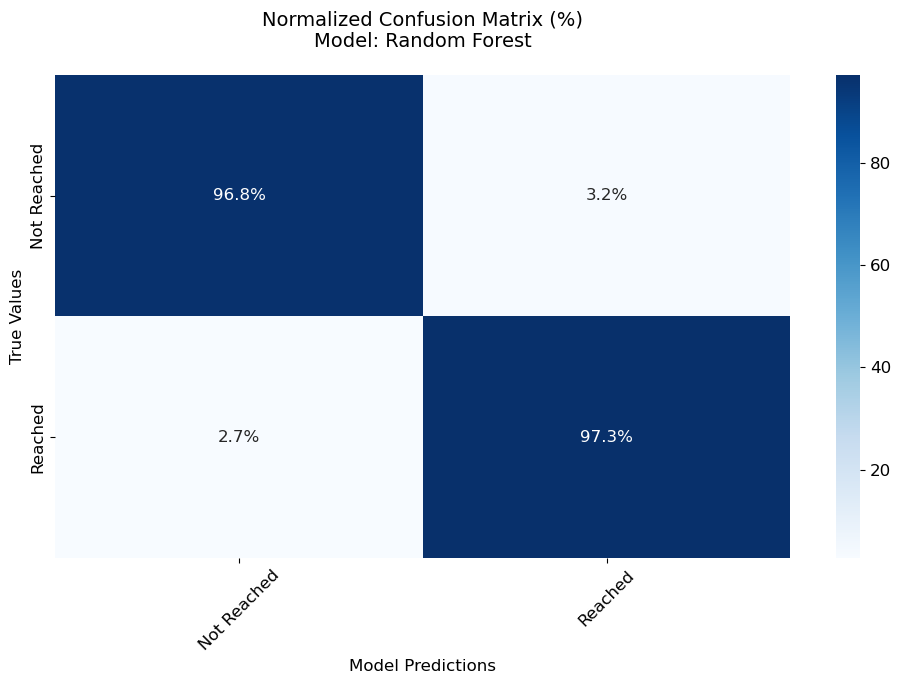

In [222]:
# Calculate normalized matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
annot_labels = np.array([f"{val:.1f}%" for val in cm_normalized.flatten()]).reshape(cm_normalized.shape)

# Use show_plot function
show_plot(
    fig_size=(10, 7),
    heatmap_data=cm_normalized,
    heatmap_annot=annot_labels,
    heatmap_fmt='',
    heatmap_cmap='Blues',
    heatmap_xticklabels=[f'{label_map[0]}', f'{label_map[1]}'],
    heatmap_yticklabels=[f'{label_map[0]}', f'{label_map[1]}'],
    heatmap_linewidths=0.5,
    heatmap_linecolor='grey',
    heatmap_cbar_kws={'label': 'Percentage by Actual Class'},
    heatmap_annot_kws={'size': 12},
    title=f'Normalized Confusion Matrix (%)\nModel: Random Forest',
    tile_font_size=14,
    title_pad=20,
    x_label='Model Predictions',
    y_label='True Values',
    x_ticks_rotation=45,
    x_ticks_ticks=[0.5, 1.5],  # Adjust based on your labels
    x_ticks_label=[f'{label_map[0]}', f'{label_map[1]}'],
    tight_layout=[0, 0, 1, 1]  # Changed from True to default rect values
)

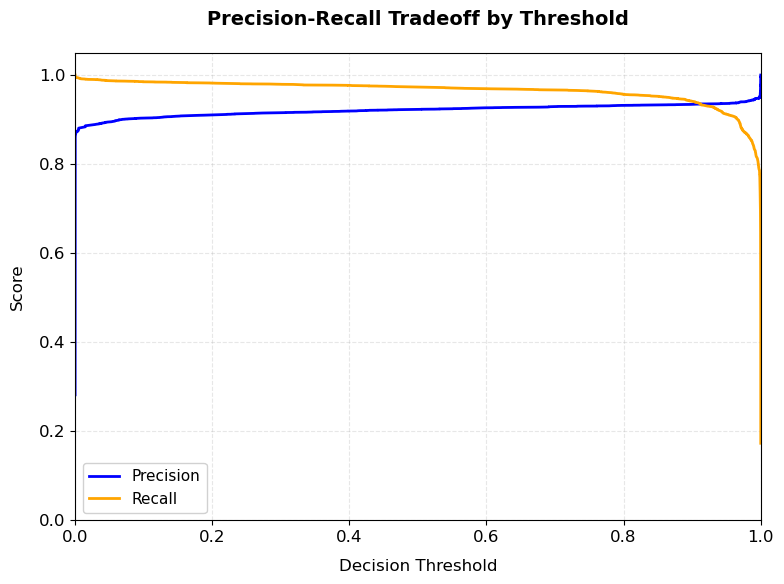

In [ ]:
if hasattr(model, "predict_proba"):
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
    precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision_curve[:-1], label="Precision", linewidth=2, color='blue')
    plt.plot(thresholds, recall_curve[:-1], label="Recall", linewidth=2, color='orange')

    # Enhanced labels and titles
    plt.xlabel("Decision Threshold", fontsize=12, labelpad=10)
    plt.ylabel("Score", fontsize=12, labelpad=10)
    plt.legend(fontsize=11, framealpha=0.9)
    plt.title("Precision-Recall Tradeoff by Threshold", pad=20, fontsize=14, fontweight='bold')

    # Formatting improvements
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.xlim([0, 1])  # Explicit threshold range
    plt.ylim([0, 1.05])  # Slight padding for visibility

    plt.tight_layout()
    plt.show()


## HERE


ERROR ANALYSIS
False positives (FP): 13712 cases (2.3%)
False negatives (FN): 4574 cases (0.8%)

DETAILED ERROR ANALYSIS

Average characteristics of False Positives (FP):
    hour  is_weekend  cumulative_steps  steps_per_hour  steps_remaining  \
0  10.54         0.0           2920.92          264.77          6184.73   

   hours_remaining  required_pace  season_Spring  season_Summer  \
0             7.46         1192.6           0.45           0.44   

   season_Autumn  season_Winter  month  
0            0.0           0.11   4.74  

Count: 13712 cases (2.3% of total)

Average characteristics of False Negatives (FN):
   hour  is_weekend  cumulative_steps  steps_per_hour  steps_remaining  \
0  9.03         0.0           2298.51          274.53          6807.13   

   hours_remaining  required_pace  season_Spring  season_Summer  \
0             8.97         929.83           0.29           0.06   

   season_Autumn  season_Winter  month  
0            0.0           0.65   2.55  

Count: 

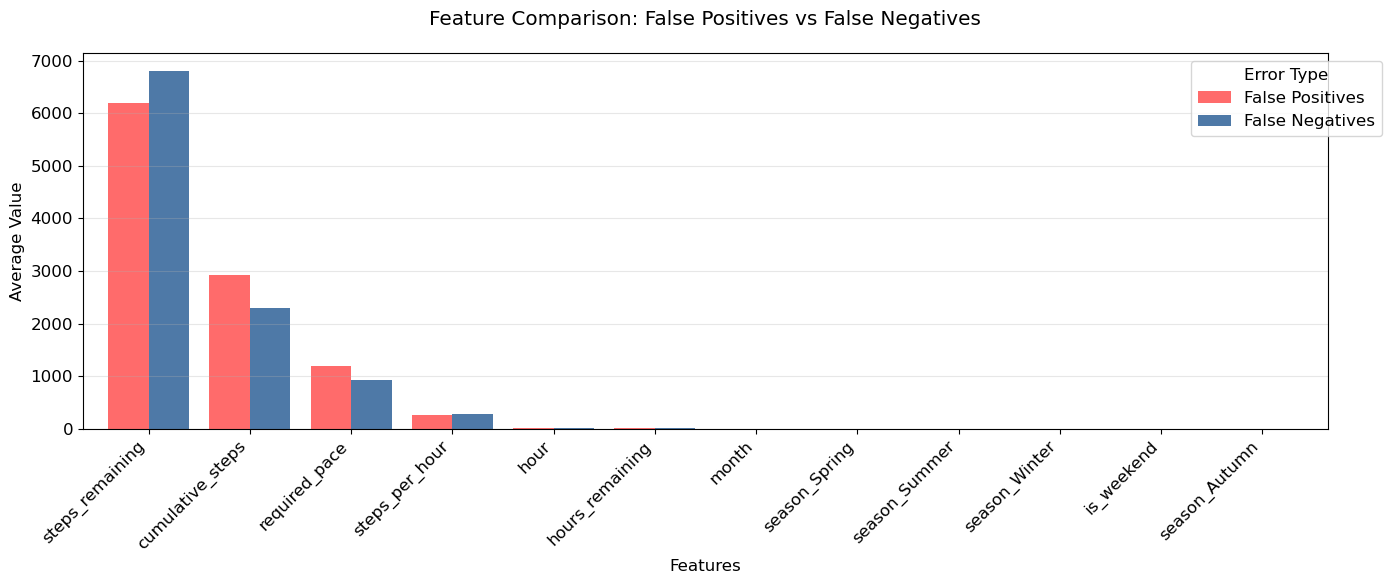

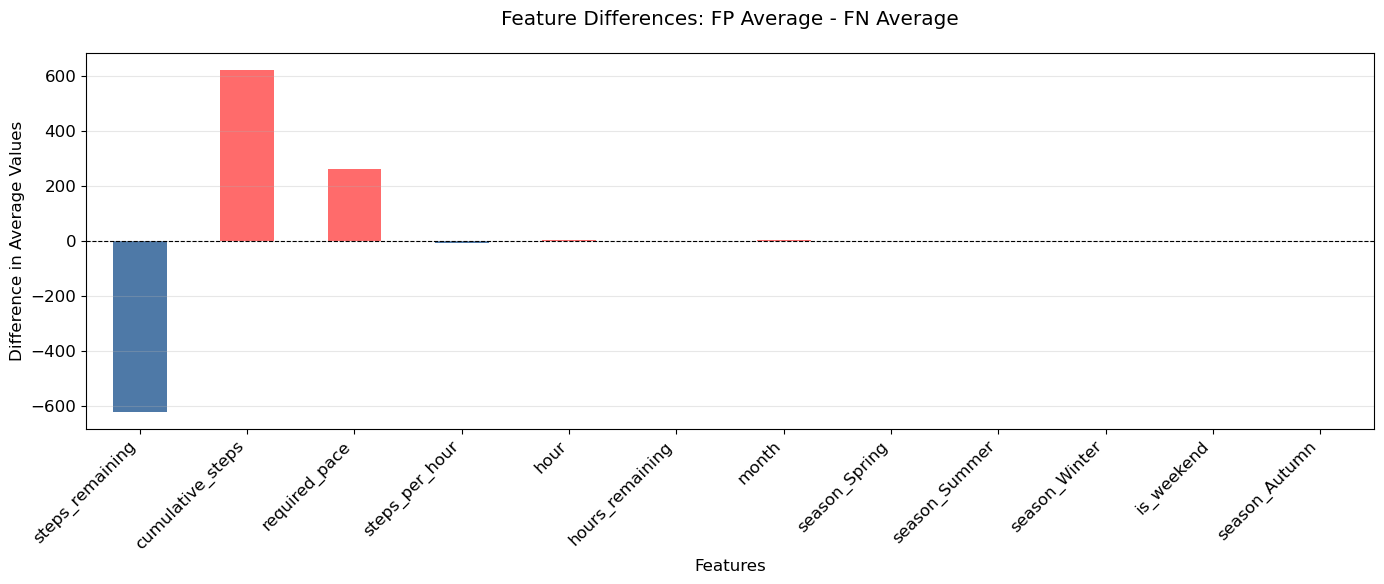

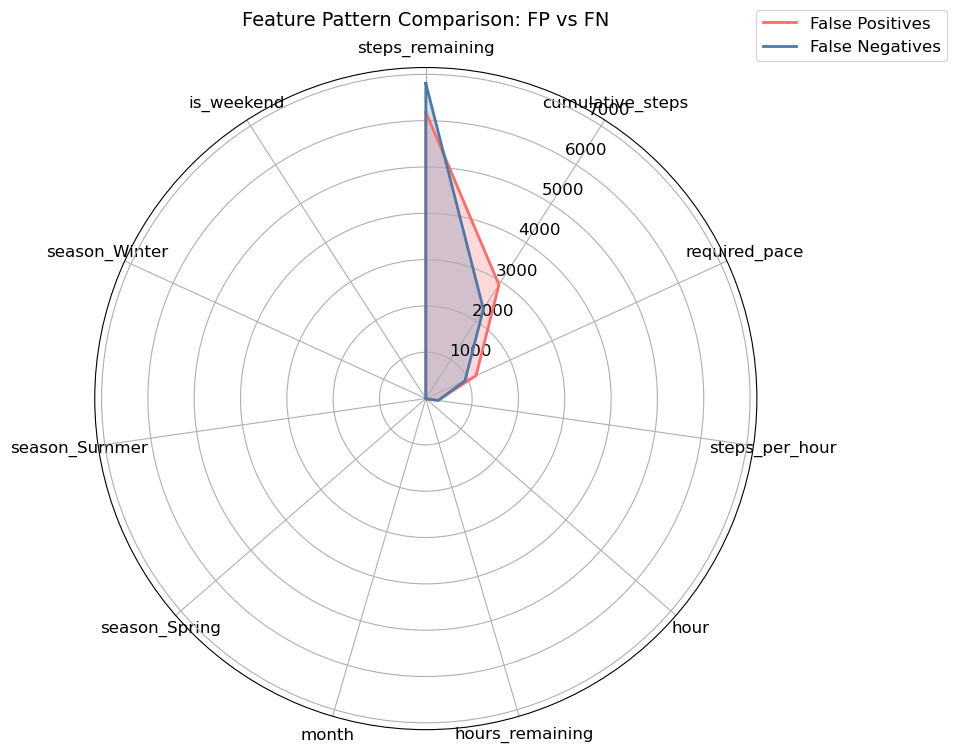


Top features with largest differences:
steps_remaining     622.405784
cumulative_steps    622.405784
required_pace       262.770651
steps_per_hour        9.757991
month                 2.186444
Name: Difference, dtype: float64

KEY INSIGHTS
1. Features with highest FP values: ['steps_remaining', 'cumulative_steps', 'required_pace']
2. Features with highest FN values: ['steps_remaining', 'cumulative_steps', 'required_pace']
3. Most differentiating features: ['steps_remaining', 'cumulative_steps', 'required_pace']


In [205]:
fp_indices = np.where((y_test == 0) & (y_pred == 1))[0]  # False positives
fn_indices = np.where((y_test == 1) & (y_pred == 0))[0]  # False negatives

print("\n" + "="*50)
print("ERROR ANALYSIS")
print("="*50)
print(f"False positives (FP): {len(fp_indices)} cases ({len(fp_indices)/len(y_test)*100:.1f}%)")
print(f"False negatives (FN): {len(fn_indices)} cases ({len(fn_indices)/len(y_test)*100:.1f}%)")

# Error Analysis with both Prints and Plots
print("\n" + "="*50)
print("DETAILED ERROR ANALYSIS")
print("="*50)

if hasattr(X_test, 'iloc'):  # If pandas DataFrame
    # Calculate averages
    fp_means = X_test.iloc[fp_indices].mean()
    fn_means = X_test.iloc[fn_indices].mean()

    # 1. Print numerical results
    print("\nAverage characteristics of False Positives (FP):")
    print(fp_means.to_frame().T.round(2))
    print(f"\nCount: {len(fp_indices)} cases ({len(fp_indices)/len(y_test)*100:.1f}% of total)")

    print("\nAverage characteristics of False Negatives (FN):")
    print(fn_means.to_frame().T.round(2))
    print(f"\nCount: {len(fn_indices)} cases ({len(fn_indices)/len(y_test)*100:.1f}% of total)")

    # 2. Create comparison dataframe for visualization
    comparison_df = pd.DataFrame({
        'False Positives': fp_means,
        'False Negatives': fn_means
    }).sort_values(by='False Positives', ascending=False)

    # 3. Plot 1: Side-by-side bar chart
    comparison_df.plot(kind='bar', color=['#FF6B6B', '#4E79A7'], width=0.8, figsize=(14, 6))
    plt.title('Feature Comparison: False Positives vs False Negatives', pad=20)
    plt.ylabel('Average Value')
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='Error Type', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

    # 4. Plot 2: Difference plot
    comparison_df['Difference'] = comparison_df['False Positives'] - comparison_df['False Negatives']
    plt.figure(figsize=(14, 6))
    comparison_df['Difference'].plot(kind='bar', color=np.where(comparison_df['Difference']>0, '#FF6B6B', '#4E79A7'))
    plt.title('Feature Differences: FP Average - FN Average', pad=20)
    plt.ylabel('Difference in Average Values')
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 5. Plot 3: Radar chart for pattern visualization
    categories = list(comparison_df.index)[:-1]  # Exclude 'Difference'
    N = len(categories)

    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # FP values
    values = comparison_df['False Positives'][categories].values.tolist()
    values += values[:1]
    ax.plot(angles, values, color='#FF6B6B', linewidth=2, label='False Positives')
    ax.fill(angles, values, color='#FF6B6B', alpha=0.25)

    # FN values
    values = comparison_df['False Negatives'][categories].values.tolist()
    values += values[:1]
    ax.plot(angles, values, color='#4E79A7', linewidth=2, label='False Negatives')
    ax.fill(angles, values, color='#4E79A7', alpha=0.25)

    # Formatting
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.set_rlabel_position(30)
    plt.title('Feature Pattern Comparison: FP vs FN', pad=30, fontsize=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

    # 6. Print top differences
    print("\nTop features with largest differences:")
    print(comparison_df['Difference'].abs().sort_values(ascending=False).head(5))

    print("\n" + "="*50)
    print("KEY INSIGHTS")
    print("="*50)
    print("1. Features with highest FP values:", list(comparison_df['False Positives'].nlargest(3).index))
    print("2. Features with highest FN values:", list(comparison_df['False Negatives'].nlargest(3).index))
    print("3. Most differentiating features:", list(comparison_df['Difference'].abs().nlargest(3).index))

In [206]:
# Feature Importance
feature_importances = model.feature_importances_
features = X_train.columns
sorted_idx = feature_importances.argsort()

In [207]:
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)
for i in range(1, len(features) + 1):
    idx = sorted_idx[-i]
    print(f"{i}. {features[idx]} : {feature_importances[idx]:.4f}")


FEATURE IMPORTANCE ANALYSIS
1. steps_remaining : 0.3061
2. cumulative_steps : 0.3016
3. steps_per_hour : 0.2221
4. hours_remaining : 0.0728
5. hour : 0.0515
6. required_pace : 0.0302
7. month : 0.0104
8. season_Winter : 0.0031
9. season_Summer : 0.0013
10. season_Spring : 0.0011
11. season_Autumn : 0.0000
12. is_weekend : 0.0000


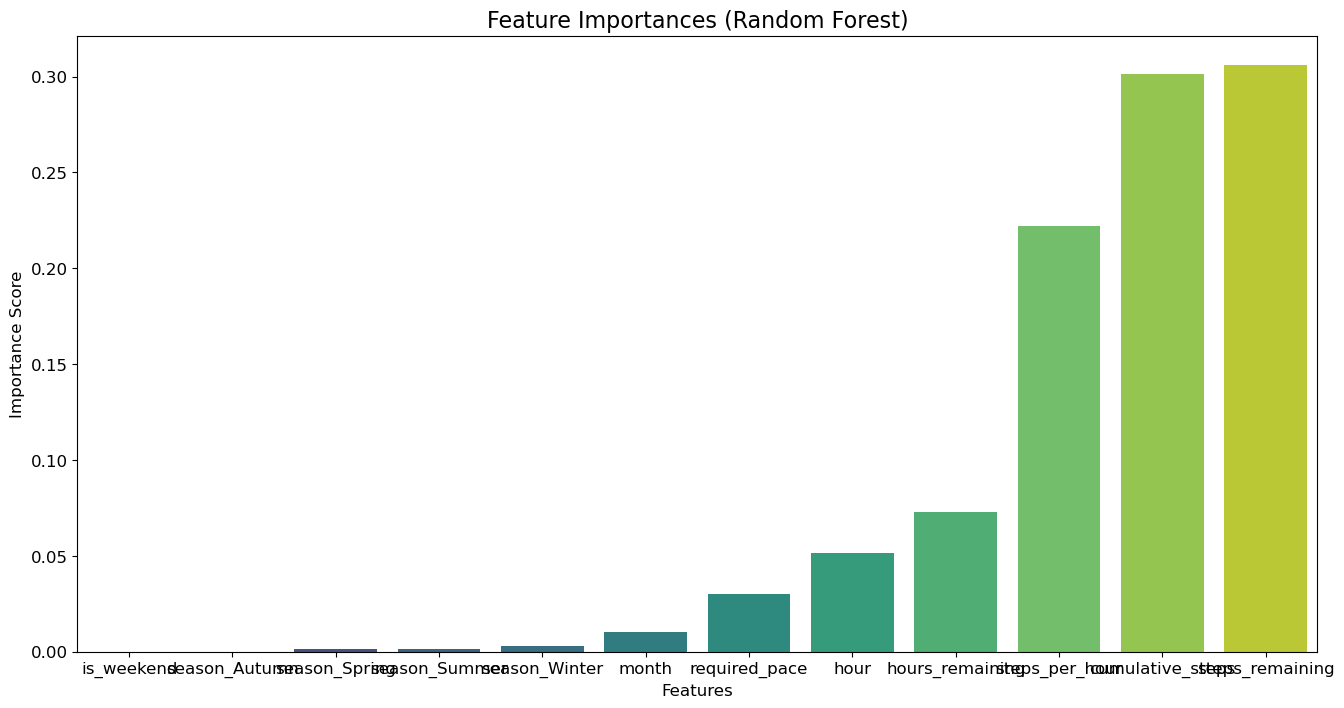

In [208]:
show_plot(
    bar_plot_x=features[sorted_idx],
    bar_plot_y=feature_importances[sorted_idx],
    bar_plot_hue=features[sorted_idx],
    bar_plot_palette='viridis',
    fig_size=(16, 8),
    title='Feature Importances (Random Forest)',
    x_label='Features',
    y_label='Importance Score',
    x_ticks_rotation=25
)

In [209]:
print("Model training and evaluation complete!\n")

Model training and evaluation complete!



## Step 7 : Model Comparison

### 1. Create a model that always predicts the majority class

In [210]:
# Baseline model comparison with label mapping
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print("\n" + "="*50)
print("BASELINE COMPARISON (Majority Class Predictor)")
print("="*50)
print("Performance of a model that always predicts the most frequent class:")

# Use label_map for target names
target_names = [label_map[0], label_map[1]]  # ["Not Reached", "Reached"]

# Generate and print formatted classification report
report_str = classification_report(
    y_test, 
    dummy_pred, 
    target_names=target_names,
    zero_division=0,
    digits=3
)
print('\n'.join([
    line for line in report_str.split('\n') 
    if 'accuracy' not in line and line.strip()
]))

# Calculate and print performance comparison
baseline_acc = dummy.score(X_test, y_test)
model_acc = accuracy_score(y_test, y_pred)
improvement = model_acc - baseline_acc

print("\n" + "-"*50)
print(f"{'Metric':<25} | {'Value':<10}")
print("-"*50)
print(f"{'Baseline Accuracy':<25} | {baseline_acc:.3f}")
print(f"{'Model Accuracy':<25} | {model_acc:.3f}")
print(f"{'Improvement':<25} | +{improvement:.3f}")
print("="*50 + "\n")

# Optional: Print the actual majority class
print(f"Note: Baseline always predicts '{label_map[y_train.mode()[0]]}'")


BASELINE COMPARISON (Majority Class Predictor)
Performance of a model that always predicts the most frequent class:
              precision    recall  f1-score   support
 Not Reached      0.718     1.000     0.836    429729
     Reached      0.000     0.000     0.000    168771
   macro avg      0.359     0.500     0.418    598500
weighted avg      0.516     0.718     0.600    598500

--------------------------------------------------
Metric                    | Value     
--------------------------------------------------
Baseline Accuracy         | 0.718
Model Accuracy            | 0.969
Improvement               | +0.251

Note: Baseline always predicts 'Not Reached'


### 2. Precision-Recall Comparison Bar Plot

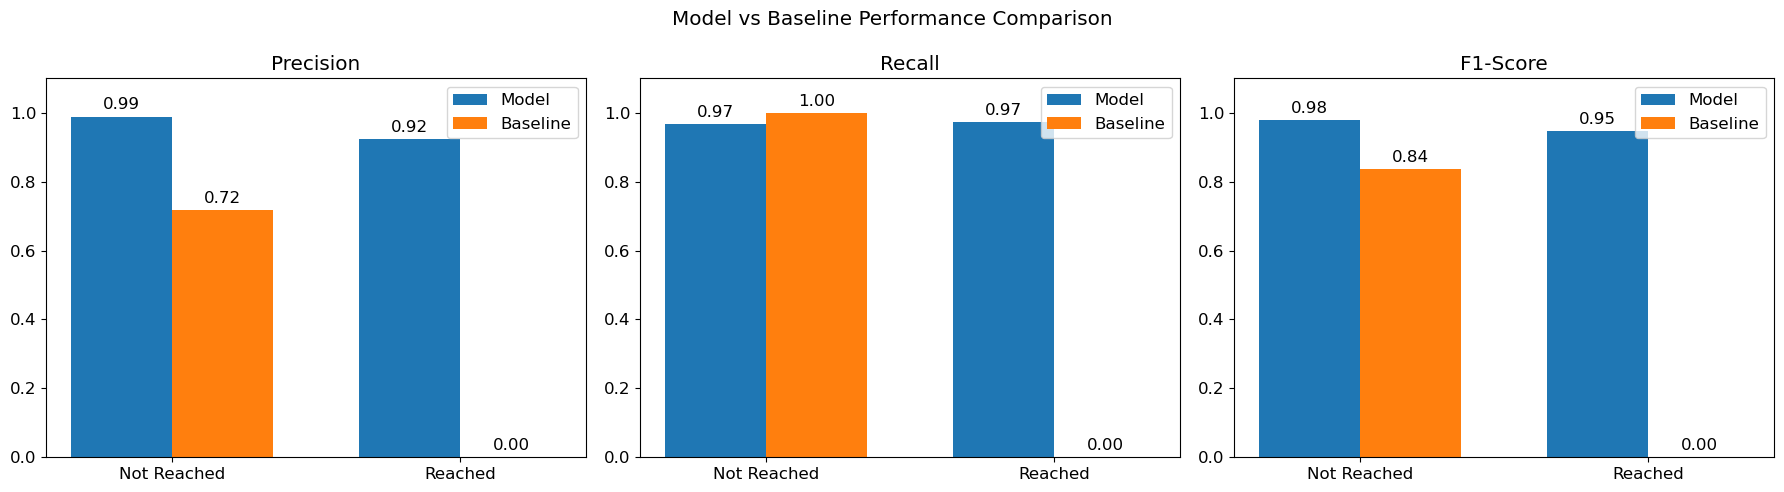

In [211]:
# Get metrics for both models
model_precision = precision
model_recall = recall
model_f1 = f1

dummy_precision, dummy_recall, dummy_f1, _ = precision_recall_fscore_support(
    y_test, dummy_pred, average=None, zero_division=0
)

# Set up the plot
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Data for plotting
metrics = ['Precision', 'Recall', 'F1-Score']
class_labels = [label_map[0], label_map[1]]
x = np.arange(len(class_labels))
width = 0.35

# Plot each metric
for i, (metric_name, model_vals, dummy_vals) in enumerate(zip(
    metrics,
    [model_precision, model_recall, model_f1],
    [dummy_precision, dummy_recall, dummy_f1]
)):
    rects1 = ax[i].bar(x - width/2, model_vals, width, label='Model')
    rects2 = ax[i].bar(x + width/2, dummy_vals, width, label='Baseline')

    ax[i].set_title(metric_name)
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(class_labels)
    ax[i].legend()
    ax[i].set_ylim(0, 1.1)

    # Add value labels
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax[i].annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

plt.suptitle('Model vs Baseline Performance Comparison')
plt.tight_layout()
plt.show()

### 3. Accuracy Improvement Visualization

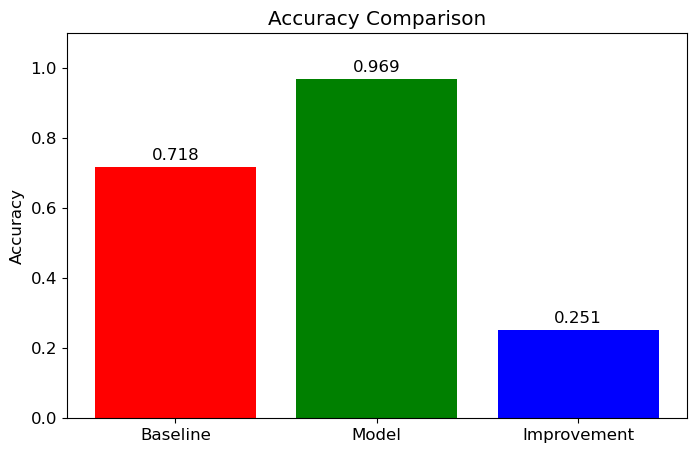

In [212]:
plt.figure(figsize=(8, 5))
acc_diff = accuracy_score(y_test, y_pred) - dummy.score(X_test, y_test)
bars = plt.bar(['Baseline', 'Model', 'Improvement'],
                [dummy.score(X_test, y_test), accuracy_score(y_test, y_pred), acc_diff],
                color=['red', 'green', 'blue'])

plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

### 4. Confusion Matrix Comparison

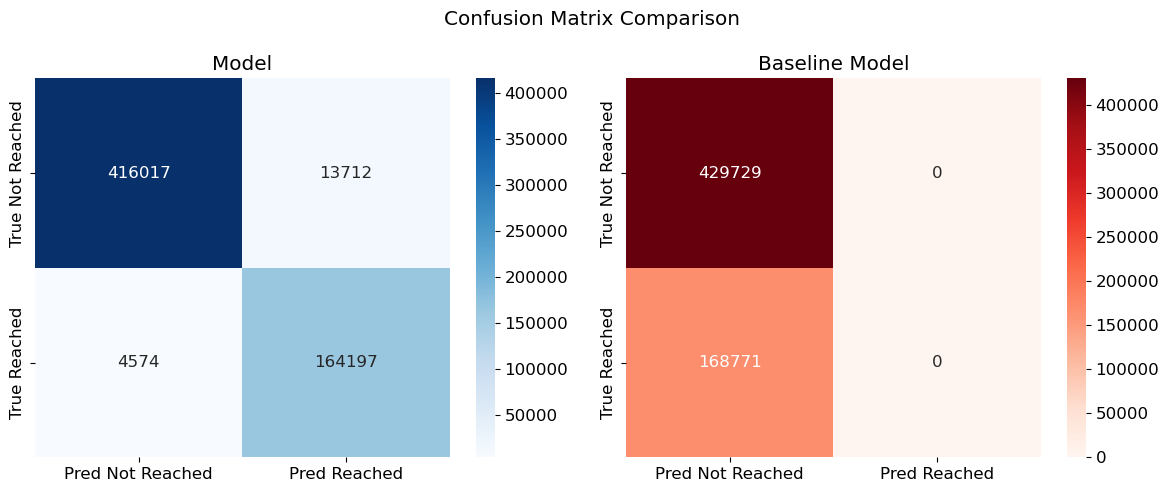

In [213]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Model's confusion matrix
cm_model = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=[f'Pred {label_map[0]}', f'Pred {label_map[1]}'], yticklabels=[f'True {label_map[0]}', f'True {label_map[1]}'])
ax1.set_title('Model')

# Baseline model's confusion matrix
cm_dummy = confusion_matrix(y_test, dummy_pred)
sns.heatmap(cm_dummy, annot=True, fmt='d', cmap='Reds', ax=ax2,
            xticklabels=[f'Pred {label_map[0]}', f'Pred {label_map[1]}'], yticklabels=[f'True {label_map[0]}', f'True {label_map[1]}'])
ax2.set_title('Baseline Model')

plt.suptitle('Confusion Matrix Comparison')
plt.tight_layout()
plt.show()

### 5. ROC Curve Comparison

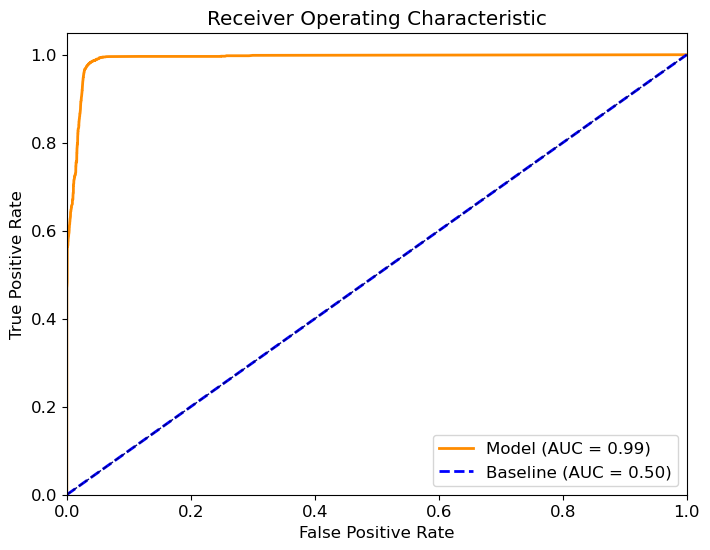

In [214]:
from sklearn.metrics import roc_curve, auc

try:
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC Curve for Mmodel
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # ROC Curve for dummy model (will be diagonal line)
    dummy_proba = np.full_like(y_test, dummy.predict_proba(X_test)[0, 1])
    dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_proba)
    dummy_auc = auc(dummy_fpr, dummy_tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label=f'Model (AUC = {roc_auc:.2f})')
    plt.plot(dummy_fpr, dummy_tpr, color='blue', lw=2, linestyle='--',
            label=f'Baseline (AUC = {dummy_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
except AttributeError:
    print("ROC curve not available - model needs to output probabilities")

### 6. Precision-Recall Curve Comparison

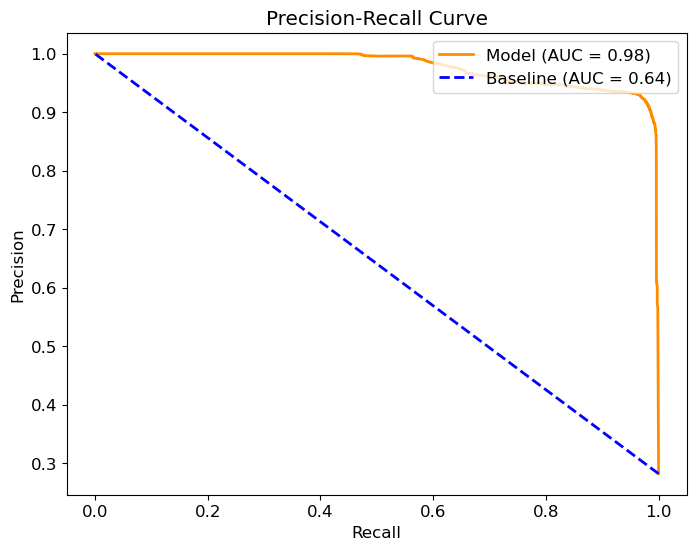

In [215]:
from sklearn.metrics import precision_recall_curve

try:
    # Precision-Recall curve for Model
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    # Precision-Recall curve for dummy model
    dummy_precision, dummy_recall, _ = precision_recall_curve(y_test, dummy_proba)
    dummy_pr_auc = auc(dummy_recall, dummy_precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2,
            label=f'Model (AUC = {pr_auc:.2f})')
    plt.plot(dummy_recall, dummy_precision, color='blue', lw=2, linestyle='--',
            label=f'Baseline (AUC = {dummy_pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()
except NameError:
    print("Precision-Recall curve not available - model needs to output probabilities")

### 7. Class Distribution and Prediction Comparison

         Class   Count      Type  Percentage
0  Not Reached  429729    Actual        71.8
1      Reached  168771    Actual        28.2
2  Not Reached  420591     Model        70.3
3      Reached  177909     Model        29.7
4  Not Reached  598500  Baseline       100.0
5      Reached       0  Baseline         0.0


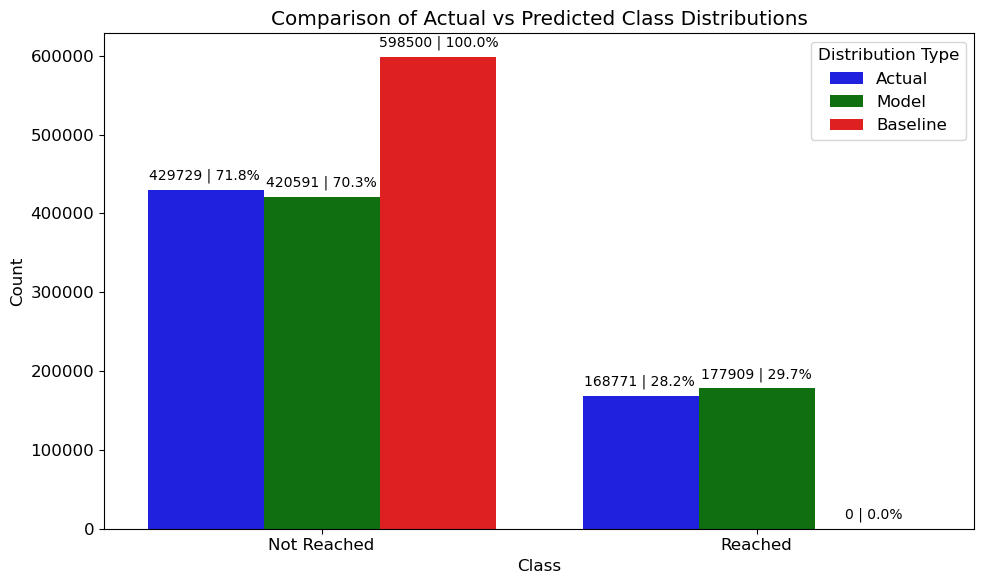

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
total = len(y_test)
data = pd.DataFrame({
    'Class': [label_map[0], label_map[1]] * 3,
    'Count': [
        sum(y_test == 0), sum(y_test == 1),  # Actual counts
        sum(y_pred == 0), sum(y_pred == 1),  # Model predictions
        sum(dummy_pred == 0), sum(dummy_pred == 1)  # Baseline predictions
    ],
    'Type': ['Actual']*2 + ['Model']*2 + ['Baseline']*2
})

# Calculate percentages
data['Percentage'] = (data['Count'] / total * 100).round(1)

# Print the dataframe
print(data)

# Create the plot
plt.figure(figsize=(10, 6))
palette = {'Actual': 'blue', 'Model': 'green', 'Baseline': 'red'}
ax = sns.barplot(x='Class', y='Count', hue='Type', data=data, palette=palette)

# Add value labels, including for 0%
for (class_name, type_name, count, percentage) in zip(data['Class'], data['Type'], data['Count'], data['Percentage']):
    # Trouver la position X du groupe de barres pour cette classe
    x_positions = list(data['Class']).index(class_name)  # 0 pour 'Class 0', 1 pour 'Class 1'

    offset = 0.27
    # Trouver la position exacte en fonction du Type (Actual, Model, Baseline)
    type_offset = {'Actual': -offset, 'Model': 0, 'Baseline': offset}  # Décale pour éviter la superposition
    x = x_positions + type_offset[type_name]

    # Placer l'annotation
    ax.annotate(f"{count} | {percentage}%",
                (x, max(count, 0.1)),  # max(count, 0.1) pour éviter que 0 soit invisible
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.title('Comparison of Actual vs Predicted Class Distributions')
plt.ylabel('Count')
plt.xlabel('Class')
plt.legend(title='Distribution Type')
plt.tight_layout()
plt.show()

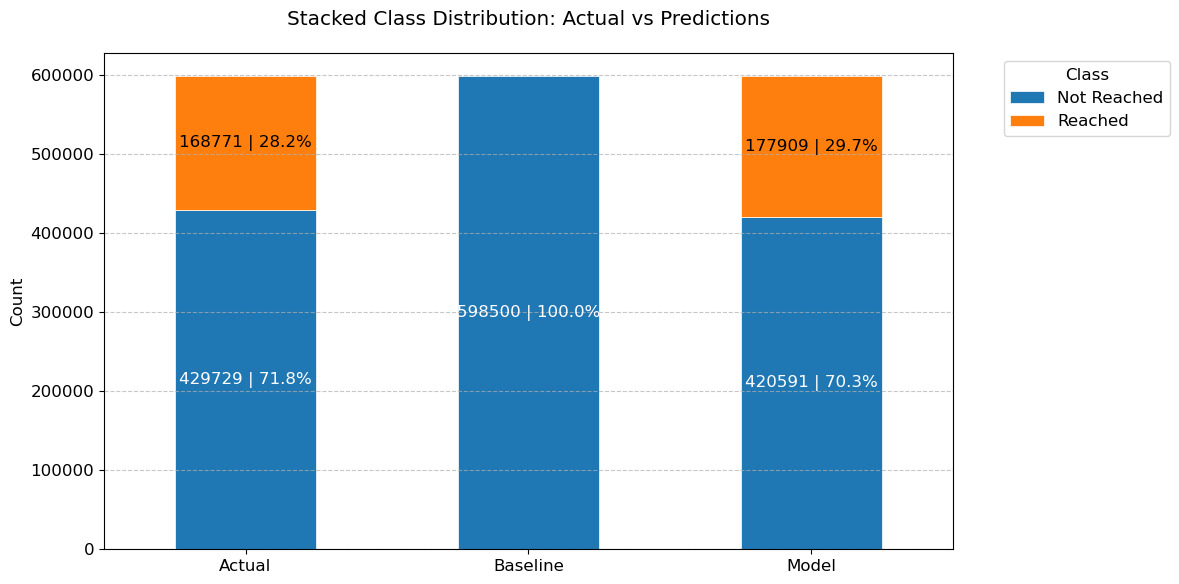

In [217]:
# Pivot the data for stacked plot
pivot_data = data.pivot(index='Type', columns='Class', values='Count')

ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6),
                    color=['tab:blue', 'tab:orange'], 
                    edgecolor='white', linewidth=0.5)

# Add value labels
for container in ax.containers:
    for p in container:
        width, height = p.get_width(), p.get_height()
        if height > 0:
            x, y = p.get_xy()
            ax.text(x + width/2, y + height/2, 
                   f"{int(height)} | {height/total*100:.1f}%",
                   ha='center', va='center',
                   color='white' if height > total*0.3 else 'black')

plt.title('Stacked Class Distribution: Actual vs Predictions', pad=20)
plt.ylabel('Count')
plt.xlabel('')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 8: Prediction Function

In [218]:
print("STEP 8: Creating prediction function...")

STEP 8: Creating prediction function...


In [219]:
def predict_for_user():
    print("\nPredict whether you will reach your daily step goal:")

    try:
        current_date = input("\nEnter current date (YYYY-MM-DD): ")
        current_time = input("Enter current time (HH:MM): ")
        current_steps = float(input("Current cumulative steps: "))

        hour = int(current_time.split(':')[0])
        if hour < 0 or hour > 23:
            raise ValueError("Hour must be between 0 and 23")
        if current_steps < 0:
            raise ValueError("Steps must be positive")

        date_obj = pd.to_datetime(current_date)
        season = get_season(date_obj)
        is_weekend = date_obj.weekday() >= 5

        user_data = pd.DataFrame({
            'hour': [hour],
            'is_weekend': [int(is_weekend)],
            'cumulative_steps': [current_steps],
            'steps_per_hour': [current_steps / (hour + 1)],
            'steps_remaining': [(overall_avg_steps * 60 * 24) - current_steps],
            'hours_remaining': [18 - hour],
            'required_pace': [((overall_avg_steps * 60 * 24) - current_steps) / (18 - hour + 0.1)],
            'season_Spring': [1 if season == 'Spring' else 0],
            'season_Summer': [1 if season == 'Summer' else 0],
            'season_Autumn': [1 if season == 'Autumn' else 0],
            'season_Winter': [1 if season == 'Winter' else 0],
            'month': [date_obj.month]
        })

        proba = model.predict_proba(user_data[features])[0][1]
        proba = max(0.01, min(0.99, proba))

        daily_goal = overall_avg_steps * 60 * 24
        progress_ratio = current_steps / daily_goal
        time_ratio = hour / 18

        adjusted_proba = proba * (1 + (progress_ratio - time_ratio))
        adjusted_proba = max(0.01, min(0.99, adjusted_proba))

        prediction_threshold = 0.5 - (0.3 * (1 - time_ratio))
        prediction = adjusted_proba >= prediction_threshold

        print(f"\nPrediction for {current_date} at {current_time}:")
        print(f"- Current: {current_steps:.0f}/{daily_goal:.0f} ({progress_ratio:.1%})")
        print(f"- Time elapsed: {time_ratio:.1%} of day")
        print(f"- Prediction: {'WILL REACH' if prediction else 'WILL NOT REACH'}")
        print(f"- Confidence: {adjusted_proba:.1%} (adjusted)")

        if hour < 18:
            remaining_hours = 18 - hour
            needed_steps = max(daily_goal - current_steps, 0)
            if remaining_hours > 0:
                hourly_pace = needed_steps / remaining_hours
                print(f"\nTo reach your goal by 18:00:")
                print(f"- Needed: {needed_steps:.0f} more steps")
                print(f"- Required pace: {hourly_pace:.0f} steps/hour")

                if hourly_pace > 1500:
                    print("- Activity suggestion: Vigorous walk + jogging")
                elif hourly_pace > 1000:
                    print("- Activity suggestion: Brisk walking")
                else:
                    print("- Activity suggestion: Leisurely walking")

    except Exception as e:
        print(f"\nError: {str(e)}")
        print("Please try again with valid inputs.")

In [220]:
print("\nStep Goal Prediction System")
print("---------------------------")
print(f"Based on average goal: {overall_avg_steps * 60 * 24:.0f} steps per day")
predict_for_user()

print("\nAnalysis complete!")


Step Goal Prediction System
---------------------------
Based on average goal: 9106 steps per day

Predict whether you will reach your daily step goal:

Error: could not convert string to float: ''
Please try again with valid inputs.

Analysis complete!
